In [1]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import seaborn as sns
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set                                  # this is to set the default Seaborn style for graphics

<function seaborn.rcmod.set(*args, **kwargs)>

## Data Preparation and Cleaning

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
data=pd.read_csv('happiness.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `13` variables/features/columns and `157` observations/samples/rows in the dataset.    
* The response variable seems to be `Happiness Score`.   
* There are `1` variables identified as `int64` by default, and it seems they are indeed Numeric.     
* There are `2` variables identified as `object` by default, and they are most likely Categorical.      
* None of the variables/features seem to have any missing value.

We identify that **Lower and Upper Confidence Interval** are not a direct predictor in helping us to estimate our response variable (Happiness Score), instead they are a measure of uncertainty. Thus, we updated the dataframe by dropping these two variables.

In [4]:
data.drop(columns=["Lower Confidence Interval","Upper Confidence Interval"], inplace=True)

Here we make all the variable names to **uppercase** to make it become more consistent. We have checked that none of the variables have any **NULL** value.

In [5]:
data.columns=data.columns.str.upper()
data.isnull().sum()

COUNTRY                          0
REGION                           0
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
ECONOMY (GDP PER CAPITA)         0
FAMILY                           0
HEALTH (LIFE EXPECTANCY)         0
FREEDOM                          0
TRUST (GOVERNMENT CORRUPTION)    0
GENEROSITY                       0
DYSTOPIA RESIDUAL                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COUNTRY                        157 non-null    object 
 1   REGION                         157 non-null    object 
 2   HAPPINESS RANK                 157 non-null    int64  
 3   HAPPINESS SCORE                157 non-null    float64
 4   ECONOMY (GDP PER CAPITA)       157 non-null    float64
 5   FAMILY                         157 non-null    float64
 6   HEALTH (LIFE EXPECTANCY)       157 non-null    float64
 7   FREEDOM                        157 non-null    float64
 8   TRUST (GOVERNMENT CORRUPTION)  157 non-null    float64
 9   GENEROSITY                     157 non-null    float64
 10  DYSTOPIA RESIDUAL              157 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.6+ KB


Description of the dataset

> **Country:** Name of the country.\
> **Region:** Region of the country belongs to.\
> **Happiness Rank:** Rank of the country based on the Happiness Score.\
> **Happiness Score:** A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."\
> **Economy (GDP per Capita):** The extent to which GDP contributes to the calculation of the Happiness Score.\
> **Family:** The extent to which Family contributes to the calculation of the Happiness Score.\
> **Health (Life Expectancy):** The extent to which Life expectancy contributed to the calculation of the Happiness Score.\
> **Freedom:** The extent to which Freedom contributed to the calculation of the Happiness Score.\
> **Trust (Government Corruption):** The extent to which Perception of Corruption contributes to Happiness Score.\
> **Generosity:** The extent to which Generosity contributed to the calculation of the Happiness Score.\
> **Dystopia Residual:** The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

---

In [7]:
print("Number of unique REGION:\t", len(data["REGION"].unique()))
data["REGION"].value_counts()

Number of unique REGION:	 10


Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: REGION, dtype: int64

Here we found that there are **10 unique regions** and it is a bit complicated. So we decided to classify them into **7 continents** according to their regions.

In [8]:
data['REGION'] = data['REGION'].replace(['Sub-Saharan Africa','Middle East','North Africa'], 'Africa')
data['REGION'] = data['REGION'].replace(['Central and Eastern Europe', 'Western Europe'], 'Europe')
data['REGION'] = data['REGION'].replace(['Southeastern Asia', 'Southern Asia', 'Eastern Asia'], 'Asia')
data['REGION'] = data['REGION'].replace(['Australia','New Zealand'], 'Oceania')
data['REGION'] = data['REGION'].replace(['Latin America','Caribbean'], 'South America')

In [9]:
data.rename(columns={'REGION': 'CONTINENT'}, inplace=True)

| Continent      | Regions                                       |
|----------------|-----------------------------------------------|
| Africa         | Sub-Saharan Africa, Middle East and North Africa |
| Europe         | Central and Eastern Europe, Western Europe     |
| Asia           | Southeastern Asia, Southern Asia, Eastern Asia |
| North America  | North America                                 |
| Oceania        | Australia and New Zealand                     |
| South America  | Latin America and Caribbean                    |

In [10]:
print("Number of unique CONTINENT:\t", len(data["CONTINENT"].unique()))
data["CONTINENT"].value_counts()

Number of unique CONTINENT:	 7


Europe                             50
Africa                             38
Latin America and Caribbean        24
Asia                               22
Middle East and Northern Africa    19
North America                       2
Australia and New Zealand           2
Name: CONTINENT, dtype: int64

In [11]:
data.head()

,COUNTRY,CONTINENT,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY (GDP PER CAPITA),FAMILY,HEALTH (LIFE EXPECTANCY),FREEDOM,TRUST (GOVERNMENT CORRUPTION),GENEROSITY,DYSTOPIA RESIDUAL
0,Denmark,Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


---
## Exploratory Data Analysis

Let us start by exploring the response variable `Happiness Score`, the one we are supposed to predict at the end of the day.

In [12]:
HS = pd.DataFrame(data['HAPPINESS SCORE'])
print("Data type : ", type(HS))
print("Data dims : ", HS.size)
HS.head(n=10)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  157


,HAPPINESS SCORE
0,7.526
1,7.509
2,7.501
3,7.498
4,7.413
5,7.404
6,7.339
7,7.334
8,7.313
9,7.291


Check the Summary Statistics of **Happiness Score** using `describe`.

In [13]:
HS.describe()

,HAPPINESS SCORE
count,157.000000
mean,5.382185
std,1.141674
min,2.905000
25%,4.404000
50%,5.314000
75%,6.269000
max,7.526000


Check the Summary Statistics visually using a standard `boxplot`.

<AxesSubplot:>

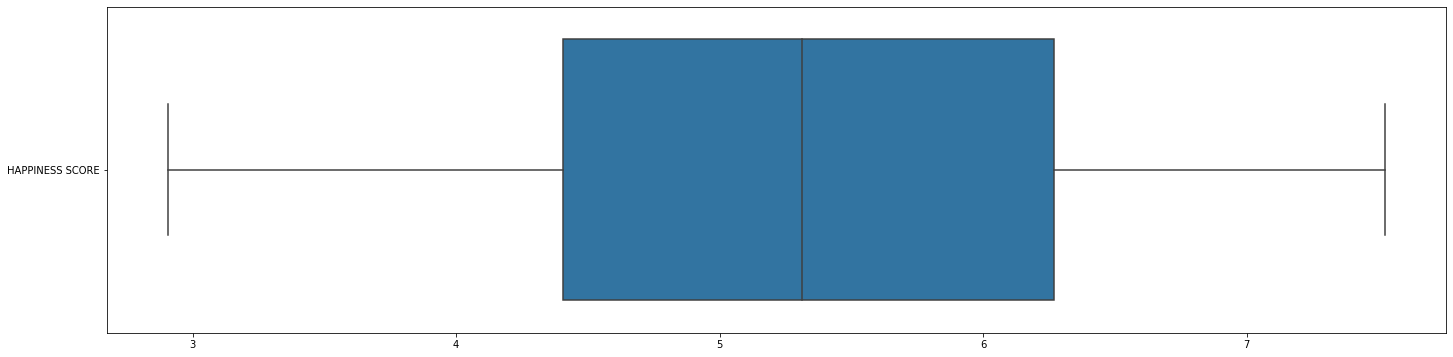

In [14]:
f = plt.figure(figsize=(24, 6))
sb.boxplot(data = HS, orient = "h")

By examining the boxplot, we found that there is **no any outliers** and **median is 5.314**.

We extend the summary to visualize the complete distribution of the Happiness Score by using `hist` and `kde`.

<AxesSubplot:ylabel='Count'>

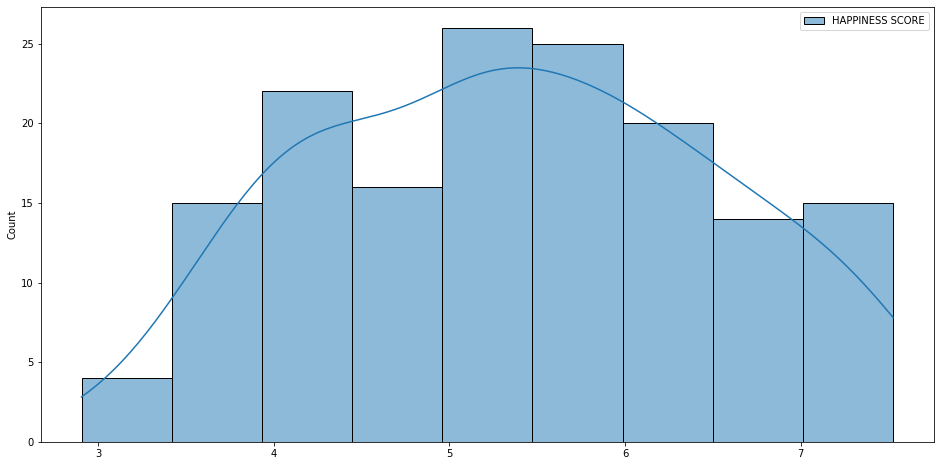

In [15]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = HS, kde = True)

Finally, the **Violin Plot** combines boxplot with kernel density estimate.

<AxesSubplot:>

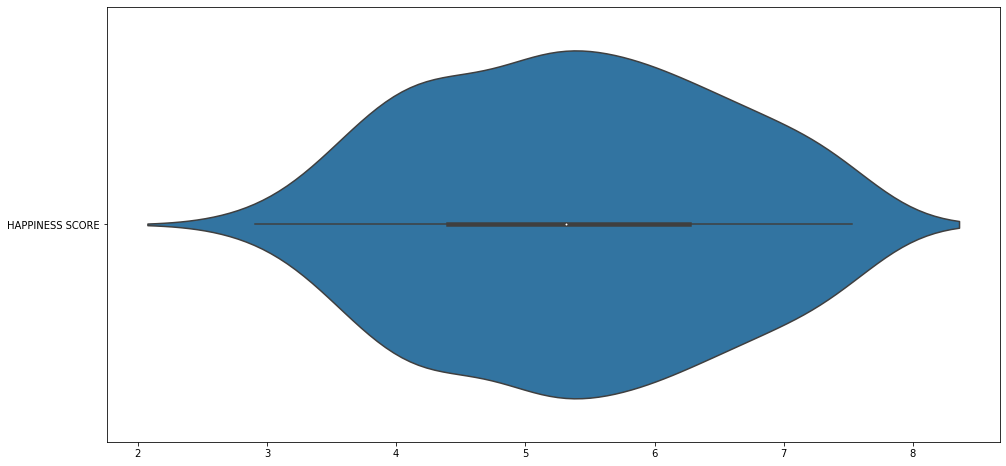

In [16]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = HS, orient = "h")

---
Now we explore the **numeric predictor variables**.

In [17]:
data[["ECONOMY (GDP PER CAPITA)", "FAMILY", "HEALTH (LIFE EXPECTANCY)","FREEDOM","TRUST (GOVERNMENT CORRUPTION)","GENEROSITY","DYSTOPIA RESIDUAL"]].describe()

,ECONOMY (GDP PER CAPITA),FAMILY,HEALTH (LIFE EXPECTANCY),FREEDOM,TRUST (GOVERNMENT CORRUPTION),GENEROSITY,DYSTOPIA RESIDUAL
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


Here are the <b>boxplots</b> for seven variables, i.e. Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity and Dystopia Residual.

Text(0.5, 1.0, 'DYSTOPIA RESIDUAL')

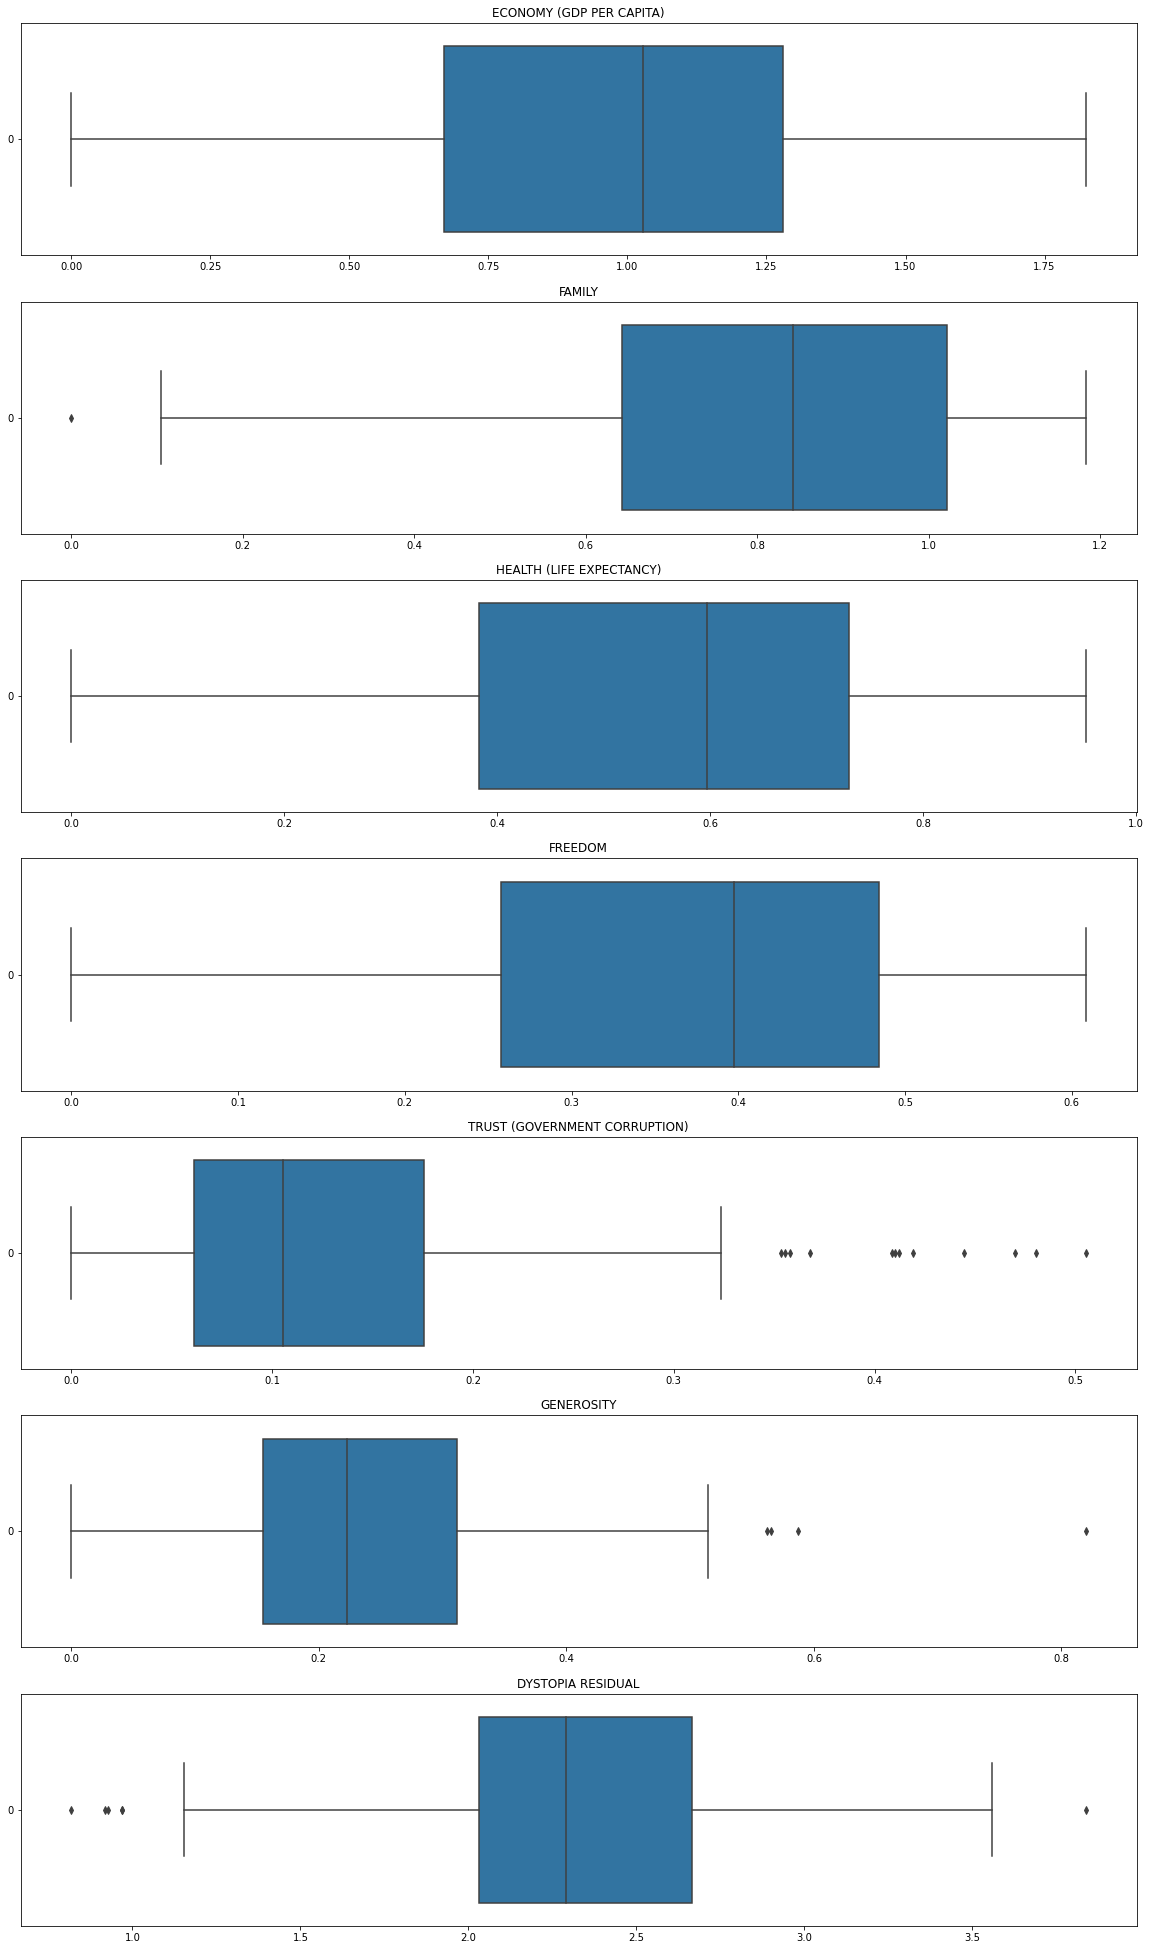

In [18]:
f, axes=plt.subplots(7, 1, figsize=(20,35))

sb.boxplot(data=data["ECONOMY (GDP PER CAPITA)"], orient='h', ax=axes[0]).set_title("ECONOMY (GDP PER CAPITA)")
sb.boxplot(data=data["FAMILY"], orient='h', ax=axes[1]).set_title("FAMILY")
sb.boxplot(data=data["HEALTH (LIFE EXPECTANCY)"], orient='h', ax=axes[2]).set_title("HEALTH (LIFE EXPECTANCY)")
sb.boxplot(data=data["FREEDOM"], orient='h', ax=axes[3]).set_title("FREEDOM")
sb.boxplot(data=data["TRUST (GOVERNMENT CORRUPTION)"], orient='h', ax=axes[4]).set_title("TRUST (GOVERNMENT CORRUPTION)")
sb.boxplot(data=data["GENEROSITY"], orient='h', ax=axes[5]).set_title("GENEROSITY")
sb.boxplot(data=data["DYSTOPIA RESIDUAL"], orient='h', ax=axes[6]).set_title("DYSTOPIA RESIDUAL")

As above, <b>Family</b> has the <b>highest median</b>. This indicates that on average, countries with higher family support tend to have higher happiness scores compared to countries with lower family support. Also, <b>Trust (Government Corruption)</b> has the <b>most outliers</b>, indicating that it might affect the accuracy of our statistical models and predictions. Hence, among all, Trust (Government Corruption) might not be the most appropriate factors to be used as a predictor

These are the boxplot, histogram and violin plot for <b>all numeric factors</b>. Here we can see the distribution of our data for our response each of our numeric predictors.

In [19]:
numericdata = pd.DataFrame(data[["ECONOMY (GDP PER CAPITA)", "FAMILY", "HEALTH (LIFE EXPECTANCY)", "FREEDOM", "TRUST (GOVERNMENT CORRUPTION)","GENEROSITY","DYSTOPIA RESIDUAL"]])

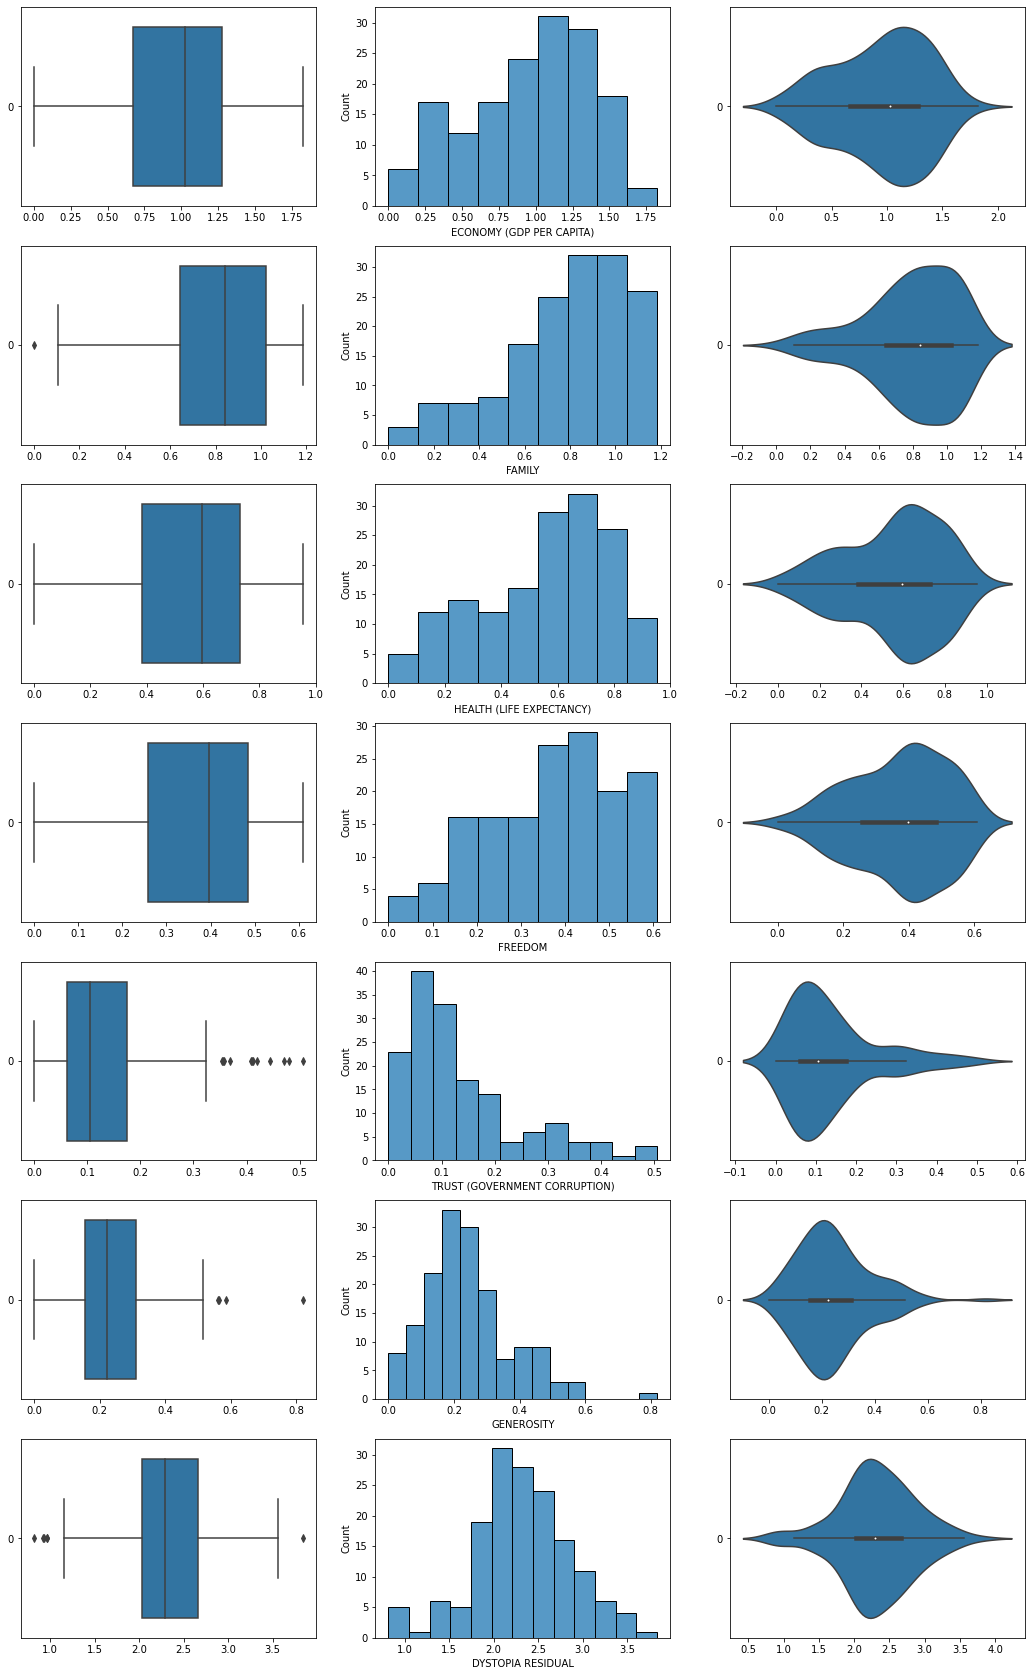

In [20]:
f, axes = plt.subplots(7, 3, figsize=(18, 30))

count = 0
for var in numericdata:
    sb.boxplot(data = numericdata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numericdata[var], ax = axes[count,1])
    sb.violinplot(data = numericdata[var], orient = "h", ax = axes[count,2])
    count += 1

Here we compute the exact **skewness** of each variables.

Skewness is a measure of symmetry, which in turn tells us more about the distribution of the data.

If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.\
If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data is moderately skewed.\
If the skewness is less than -1 or greater than 1, the data is highly skewed.

In [21]:
for i in numericdata:
    print("Skewness of ", i, "\t\t: ", data[i].skew())

Skewness of  ECONOMY (GDP PER CAPITA) 		:  -0.38395976535120396
Skewness of  FAMILY 		:  -0.8559360851571237
Skewness of  HEALTH (LIFE EXPECTANCY) 		:  -0.5334071565151417
Skewness of  FREEDOM 		:  -0.4524922908117271
Skewness of  TRUST (GOVERNMENT CORRUPTION) 		:  1.374314700966475
Skewness of  GENEROSITY 		:  0.9552056920863042
Skewness of  DYSTOPIA RESIDUAL 		:  -0.17116737504315213


Below is the <b>correlation table</b> and <b>heatmap</b> to better visualise which predictors are more correlated with our response, namely Happiness Score.

In [22]:
numericdata2 = pd.DataFrame(data[["HAPPINESS SCORE", "ECONOMY (GDP PER CAPITA)", "FAMILY", "HEALTH (LIFE EXPECTANCY)", "FREEDOM", "TRUST (GOVERNMENT CORRUPTION)","GENEROSITY","DYSTOPIA RESIDUAL"]])
numericdata2.corr()

,HAPPINESS SCORE,ECONOMY (GDP PER CAPITA),FAMILY,HEALTH (LIFE EXPECTANCY),FREEDOM,TRUST (GOVERNMENT CORRUPTION),GENEROSITY,DYSTOPIA RESIDUAL
HAPPINESS SCORE,1.000000,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
ECONOMY (GDP PER CAPITA),0.790322,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
FAMILY,0.739252,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
HEALTH (LIFE EXPECTANCY),0.765384,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
FREEDOM,0.566827,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
TRUST (GOVERNMENT CORRUPTION),0.402032,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
GENEROSITY,0.156848,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
DYSTOPIA RESIDUAL,0.543738,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000


<AxesSubplot:>

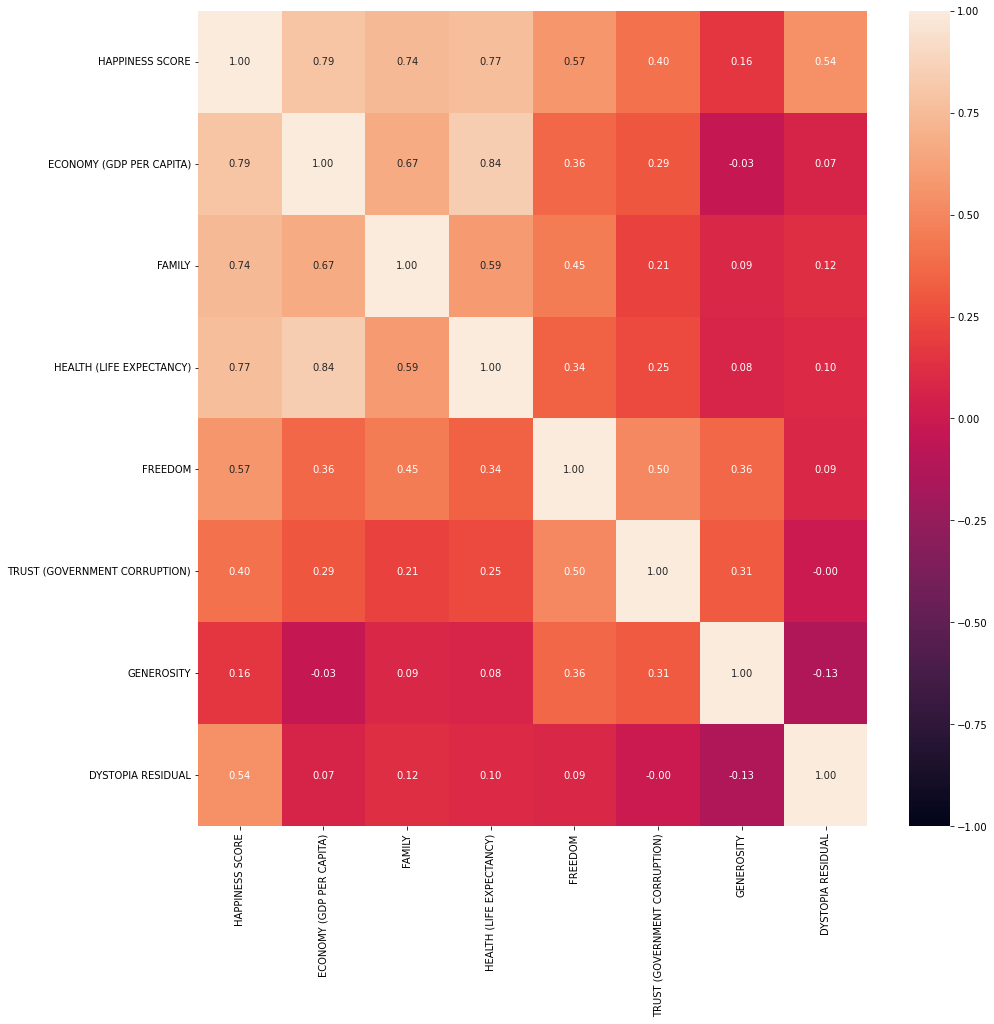

In [23]:
f = plt.figure(figsize=(15, 15))
sb.heatmap(numericdata2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<b>Pairplot</b> is plotted to visualise the relationship between each other in terms of their Happiness Scores and other numeric factors.

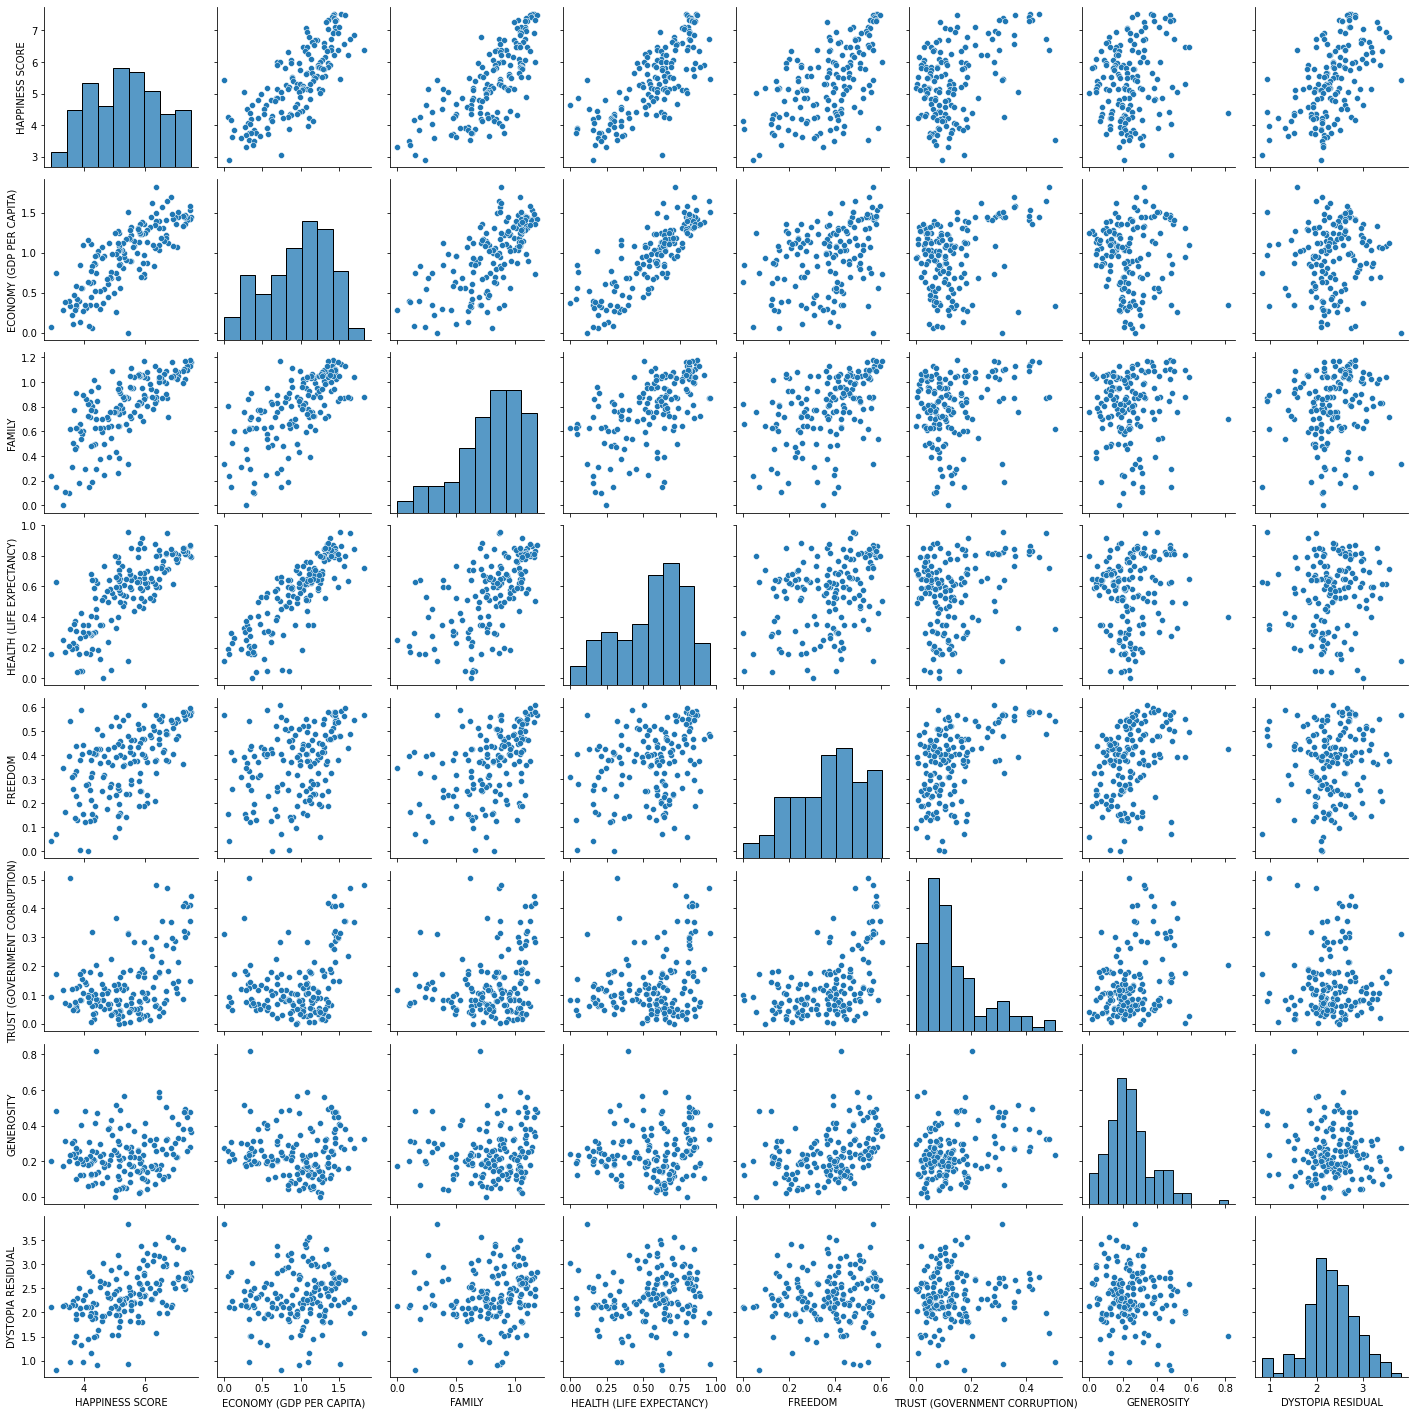

In [24]:
sb.pairplot(data = numericdata2)

By combining both heatmap and pairplot, we can see for all numeric factors and Happiness Score, they <b>all have positive relationships</b>. This is shown by the positive correlation index in heatmap and trend pattern in pairplot.

Here we quickly check out the **Categorical variables**.

In [25]:
data[['COUNTRY','CONTINENT']].describe()

,COUNTRY,CONTINENT
count,157,157
unique,157,7
top,Denmark,Europe
freq,1,50


Below is the <b>bar plot</b> that shows the happiness score of each continent.

<BarContainer object of 157 artists>

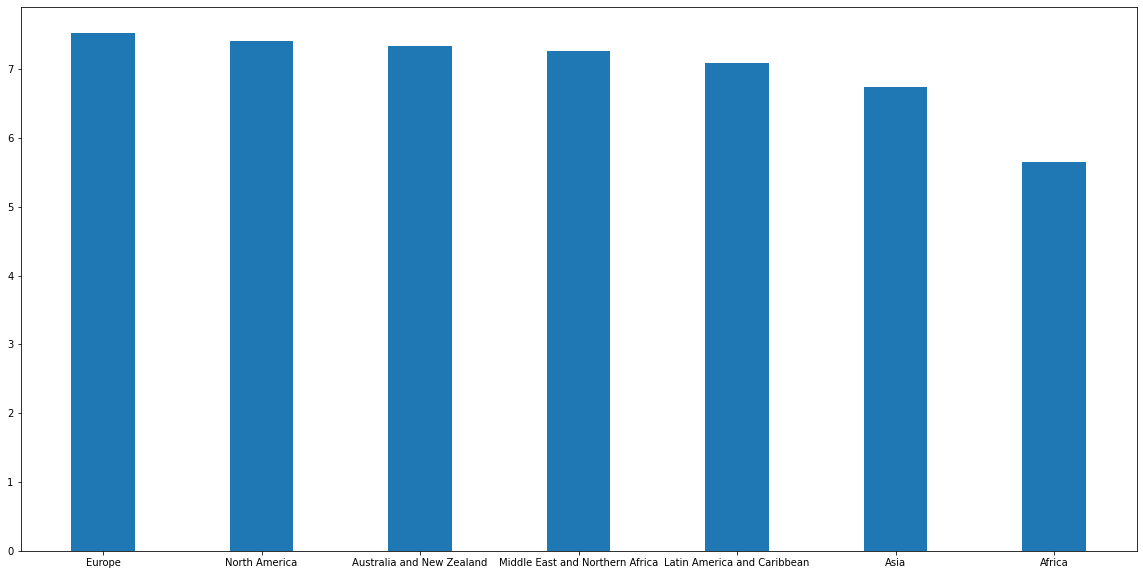

In [26]:
fig = plt.figure(figsize = (20, 10))

plt.bar(data['CONTINENT'], data['HAPPINESS SCORE'], width = 0.4)

<AxesSubplot:xlabel='HAPPINESS SCORE', ylabel='CONTINENT'>

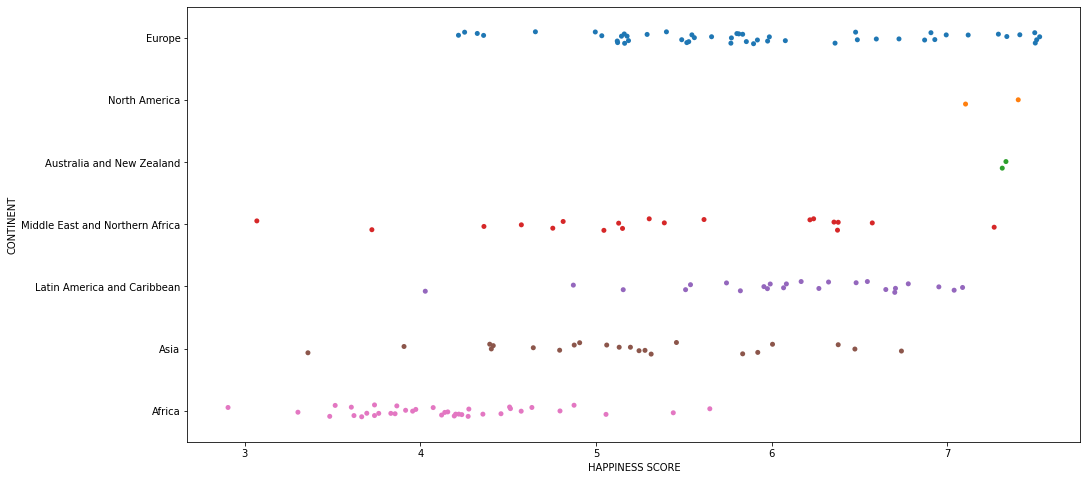

In [27]:
# Rating vs Amount
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'HAPPINESS SCORE', y = 'CONTINENT', data = data)

As above, <b>Europe</b> has the highest happiness score, followed by <b>North America, Australia and New Zealand</b>.

Below is a map that visualises the happiness scores for all countries.

In [28]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(data, locations='COUNTRY',
                    locationmode='country names',
                    color='HAPPINESS SCORE',
                    hover_name='COUNTRY',
                    title='Happiness Score',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

We have filter and pick out <b>4 factors</b> out of 7 factors that we believe would be the most significant contributing factors to the Happiness Score after our data analysis. First of all, Trust (government corruption), Generosity and Dystopia Residual are excluded as we can see they have the <b>most outliers</b> in the boxplot compared to the other factors. On top of that, from the heatmap, we could see that the <b>ranking for the strongest correlation</b> between the predictor and Happiness Score is Economy (GDP per capita) > Health (Life Expectancy) > Family > Freedom > Dystopia Residual > Trust(government corruption) > Generosity.

In conclusion, the four factors that seems more significant in the relationship with Happiness Score, namely <b>Economy (GDP per Capita), Health (Life Expectancy), Family and Freedom</b> will be the predictors used in machine learnings to solve our problems.

---
# Machine Learning

We perform our machine learning using the following models.

## Regression
- Linear Regression
- Random Forest Regression

## Classification
- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

---
## Machine Learning I (Linear Regression)

Firstly, we perform `Linear Regression` to find out the relationship between the numeric predictors and the numeric response variables. LinearRegression fits a linear model with coefficients a = (a1, …, ap) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation

- Response Variable : Happiness Score
- Predictors (numeric) : Economy (GDP per capita), Family, Health (Life Expectancy), Freedom

### Uni-Variate Linear Regression

We will start by setting up a Uni-Variate Linear Regression problem.   

Extract the variables and the associated data as a Pandas `DataFrame`.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

We now start with examining the regression model with <b>Economy (GDP per capita)</b> as our response variable.

Response Variable : **HAPPINESS SCORE**     
Predictor Feature : **ECONOMY (GDP PER CAPITA)**    

> Regression Model : HAPPINESS SCORE = $a$ $\times$ ECONOMY (GDP PER CAPITA) + $b$  

We split the data into train:test = 8:2.

In [30]:
y = pd.DataFrame(data["HAPPINESS SCORE"])
X = pd.DataFrame(data[["ECONOMY (GDP PER CAPITA)"]])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (125, 1) (125, 1)
Test Set  : (32, 1) (32, 1)


A glance at the <b>summary of statistics</b> of Happiness Score and Economy (GDP per capita).

In [31]:
y_train.describe()

,HAPPINESS SCORE
count,125.000000
mean,5.400064
std,1.133672
min,2.905000
25%,4.459000
50%,5.389000
75%,6.239000
max,7.526000


In [32]:
X_train.describe()

,ECONOMY (GDP PER CAPITA)
count,125.000000
mean,0.945033
std,0.420659
min,0.056610
25%,0.613910
50%,1.027870
75%,1.279730
max,1.824270


We create a Linear Regression object and fit the model using the train data.

Intercept 	: b =  [3.31099419]
Coefficients 	: a =  [[2.21057784]]


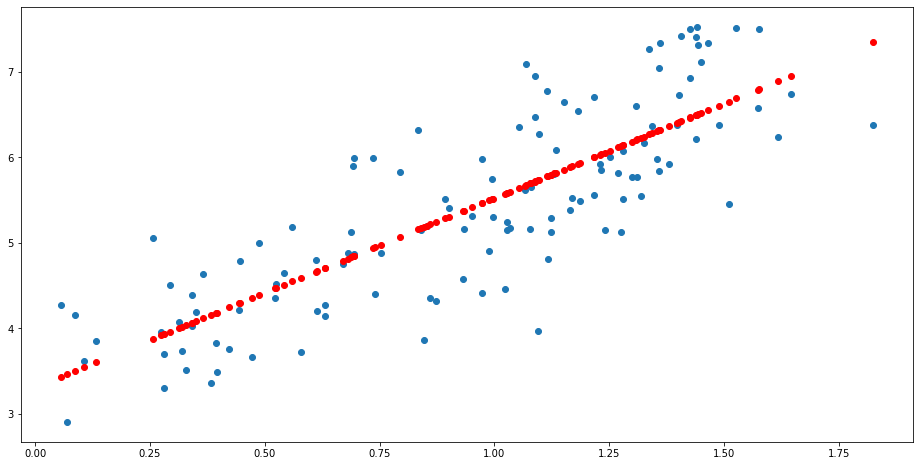

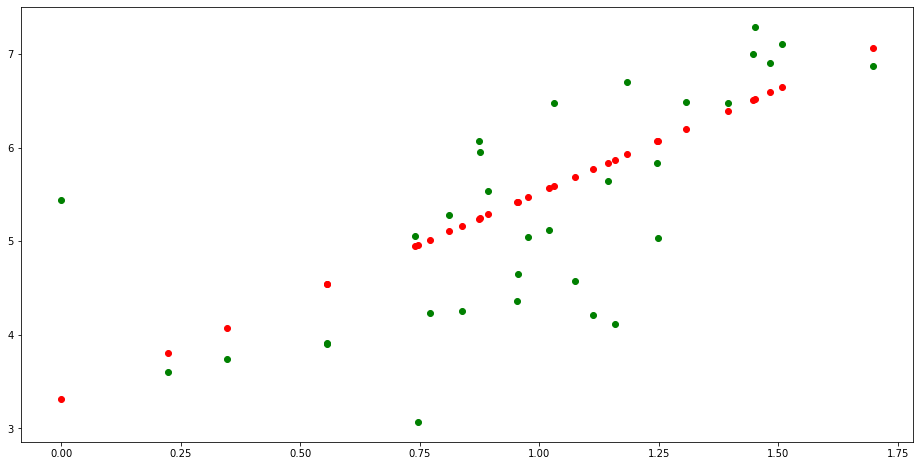

Goodness of Fit of Model 	Train Dataset(ECONOMY (GDP PER CAPITA))
Explained Variance (R^2) 	: 0.6728183677783938
Mean Squared Error (MSE) 	: 0.4171334938064424
Root Mean Squared Error (RMSE) 	: 0.6458587258885974

Goodness of Fit of Model 	Test Dataset(ECONOMY (GDP PER CAPITA))
Explained Variance (R^2) 	: 0.4420337129860421
Mean Squared Error (MSE) 	: 0.7632115217299551
Root Mean Squared Error (RMSE) 	: 0.873619780985959


In [33]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', format(linreg.intercept_))
print('Coefficients \t: a = ', format(linreg.coef_))

y_train_pred = linreg.predict(X_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset(ECONOMY (GDP PER CAPITA))")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print()
print("Goodness of Fit of Model \tTest Dataset(ECONOMY (GDP PER CAPITA))")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

The <b>explained variance (R^2)</b> is at the average between 0 and 1, so we cannot tell anything much with this metric. On the other hand, the <b>mean squared error (MSE)</b> for both train and test data is quite low, indicating a high accuracy of Economy (GDP per capita) in predicting our response, Happiness Score.

---
We now start with examining the regression model with <b>Family</b> as our response variable.

Response Variable : **HAPPINESS SCORE**     
Predictor Feature : **FAMILY**    

> Regression Model : HAPPINESS SCORE = $a$ $\times$ FAMILY + $b$  

In [34]:
y = pd.DataFrame(data["HAPPINESS SCORE"])
X = pd.DataFrame(data[["FAMILY"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (125, 1) (125, 1)
Test Set  : (32, 1) (32, 1)


A glance at the <b>summary of statistics</b> of Family.

In [35]:
X_train.describe()

,FAMILY
count,125.000000
mean,0.802152
std,0.260591
min,0.000000
25%,0.660620
50%,0.848290
75%,1.014130
max,1.183260


Intercept 	: b =  [2.83890421]
Coefficients 	: a =  [[3.19285999]]


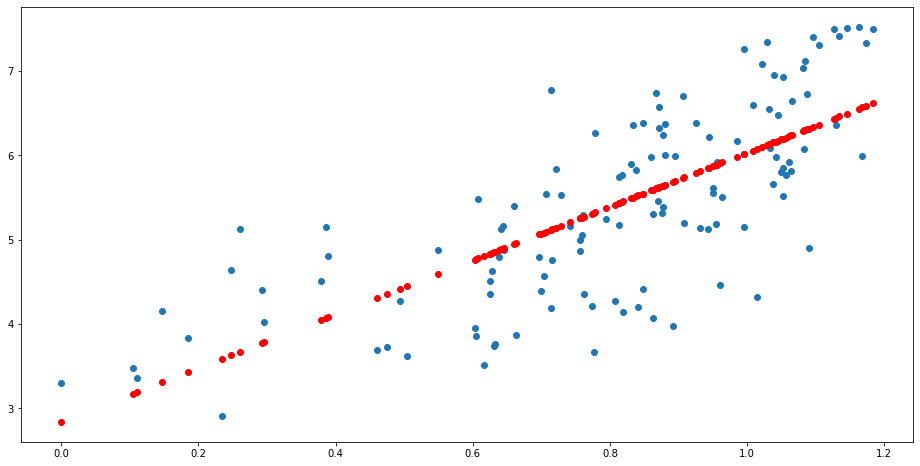

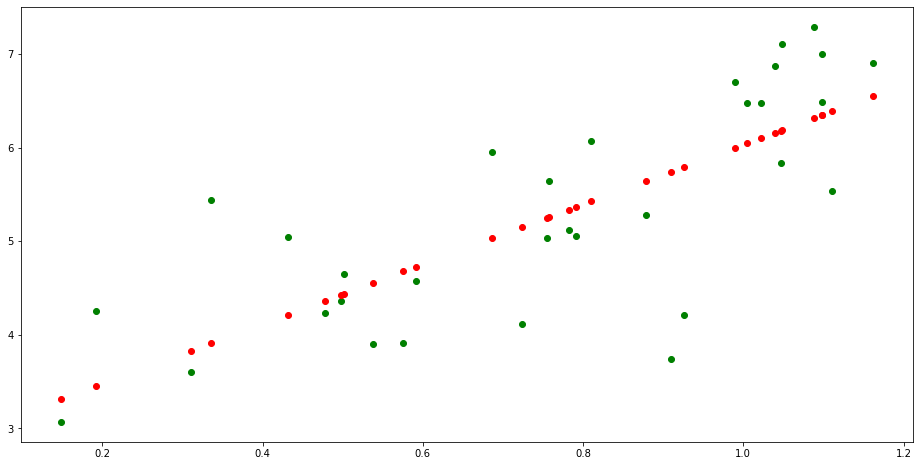

Goodness of Fit of Model 	Train Dataset(FAMILY)
Explained Variance (R^2) 	: 0.5386472570602108
Mean Squared Error (MSE) 	: 0.5881921923089886
Root Mean Squared Error (RMSE) 	: 0.7669368893911601

Goodness of Fit of Model 	Test Dataset(FAMILY)
Explained Variance (R^2) 	: 0.5725084347662142
Mean Squared Error (MSE) 	: 0.5847422964832933
Root Mean Squared Error (RMSE) 	: 0.7646844424226854


In [36]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', format(linreg.intercept_))
print('Coefficients \t: a = ', format(linreg.coef_))

y_train_pred = linreg.predict(X_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset(FAMILY)")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print()
print("Goodness of Fit of Model \tTest Dataset(FAMILY)")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

The <b>explained variance (R^2)</b> is at the average between 0 and 1, so we cannot tell anything much with this metric. On the other hand, the <b>mean squared error (MSE)</b> for both train and test data is quite low, indicating a high accuracy of Family in predicting our response, Happiness Score.

---
We now start with examining the regression model with <b>Health (Life Expectancy)</b> as our response variable.

Response Variable : **HAPPINESS SCORE**     
Predictor Feature : **HEALTH (LIFE EXPECTANCY)**    

> Regression Model : HAPPINESS SCORE = $a$ $\times$ HEALTH (LIFE EXPECTANCY) + $b$  

In [37]:
y = pd.DataFrame(data["HAPPINESS SCORE"])
X = pd.DataFrame(data[["HEALTH (LIFE EXPECTANCY)"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (125, 1) (125, 1)
Test Set  : (32, 1) (32, 1)


A glance at the <b>summary of statistics</b> of Health (Life Expectancy).

In [38]:
X_train.describe()

,HEALTH (LIFE EXPECTANCY)
count,125.000000
mean,0.552335
std,0.231570
min,0.000000
25%,0.357000
50%,0.594690
75%,0.721830
max,0.952770


Intercept 	: b =  [3.23170961]
Coefficients 	: a =  [[3.92579716]]


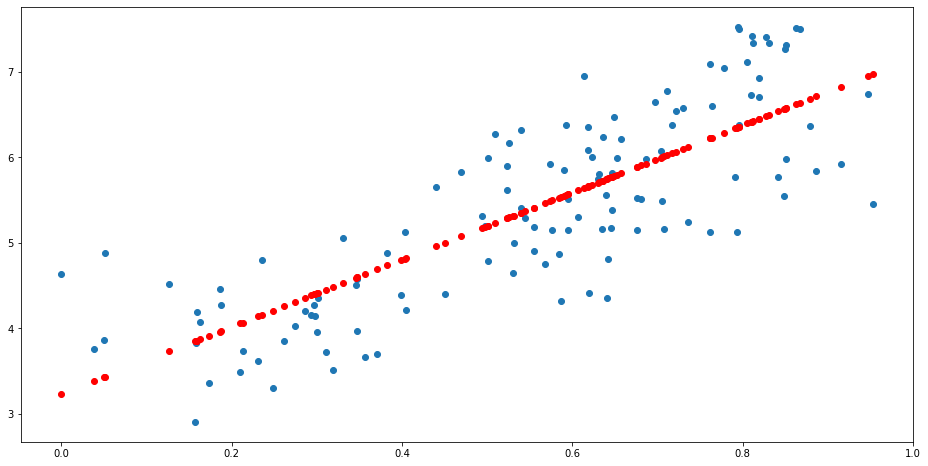

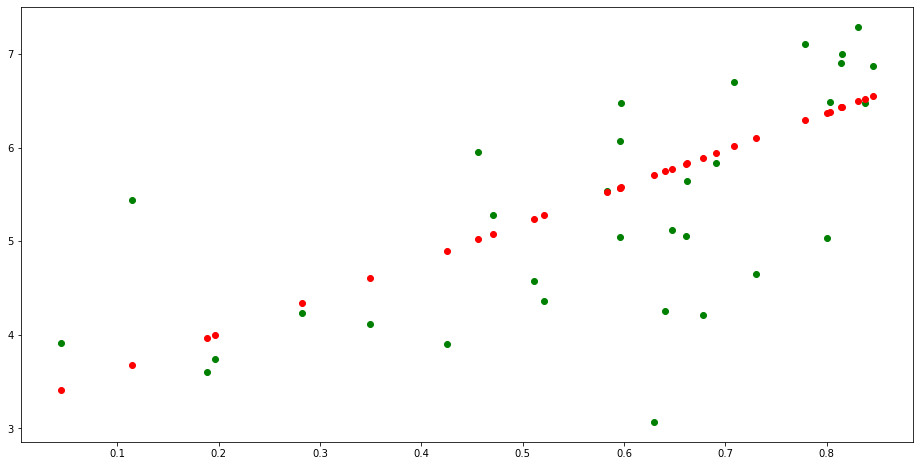

Goodness of Fit of Model 	Train Dataset(HEALTH (LIFE EXPECTANCY))
Explained Variance (R^2) 	: 0.6430529483152316
Mean Squared Error (MSE) 	: 0.45508230325205773
Root Mean Squared Error (RMSE) 	: 0.6745978826323559

Goodness of Fit of Model 	Test Dataset(HEALTH (LIFE EXPECTANCY))
Explained Variance (R^2) 	: 0.36768864184427397
Mean Squared Error (MSE) 	: 0.8649040723370696
Root Mean Squared Error (RMSE) 	: 0.9300021894259548


In [39]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', format(linreg.intercept_))
print('Coefficients \t: a = ', format(linreg.coef_))

y_train_pred = linreg.predict(X_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset(HEALTH (LIFE EXPECTANCY))")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print()
print("Goodness of Fit of Model \tTest Dataset(HEALTH (LIFE EXPECTANCY))")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

The <b>explained variance (R^2)</b> is at the average between 0 and 1 for the train data set, so we cannot tell anything much on this. However, the <b>explained variance (R^2)</b> is quite low for the test data set, which is not that ideal. On the other hand, the <b>mean squared error (MSE)</b> for both train and test data is quite low, indicating a high accuracy of Health (Life Expectancy) in predicting our response, happiness score.

---
We now start with examining the regression model with <b>Freedom</b> as our response variable.

Response Variable : **HAPPINESS SCORE**     
Predictor Feature : **FREEDOM**    

> Regression Model : HAPPINESS SCORE = $a$ $\times$ FREEDOM + $b$  

In [40]:
y = pd.DataFrame(data["HAPPINESS SCORE"])
X = pd.DataFrame(data[["FREEDOM"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (125, 1) (125, 1)
Test Set  : (32, 1) (32, 1)


A glance at the <b>summary of statistics</b> of Freedom.

In [41]:
X_train.describe()

,FREEDOM
count,125.000000
mean,0.362692
std,0.144283
min,0.000000
25%,0.254290
50%,0.390310
75%,0.468230
max,0.608480


Intercept 	: b =  [3.78057252]
Coefficients 	: a =  [[4.46520361]]


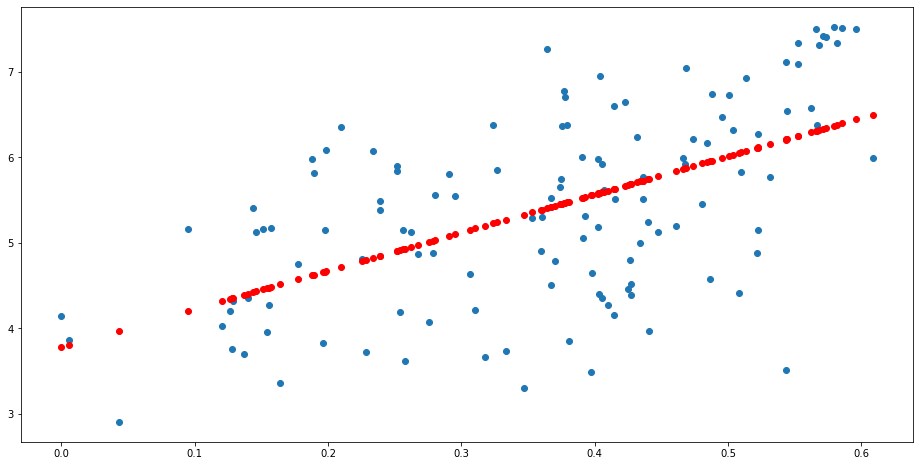

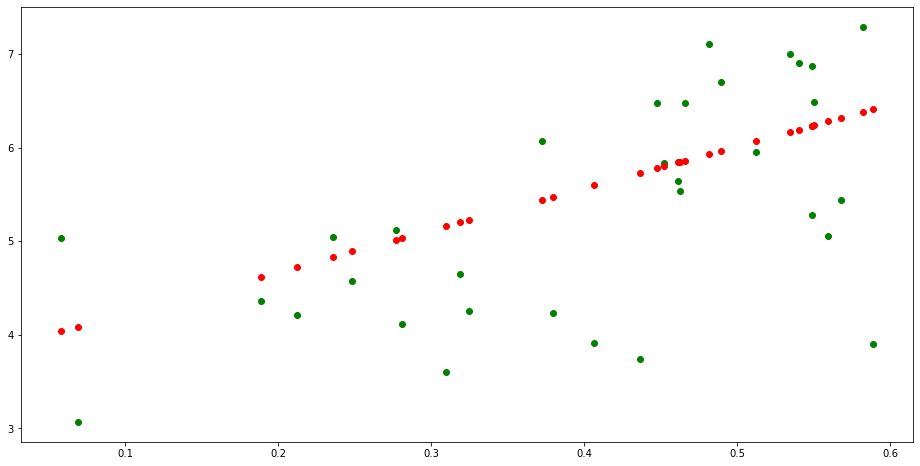

Goodness of Fit of Model 	Train Dataset(FREEDOM)
Explained Variance (R^2) 	: 0.32295054435241277
Mean Squared Error (MSE) 	: 0.8631902805678886
Root Mean Squared Error (RMSE) 	: 0.9290803412880334

Goodness of Fit of Model 	Test Dataset(FREEDOM))
Explained Variance (R^2) 	: 0.3013609995606481
Mean Squared Error (MSE) 	: 0.9556300211590991
Root Mean Squared Error (RMSE) 	: 0.9775633080057267


In [42]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', format(linreg.intercept_))
print('Coefficients \t: a = ', format(linreg.coef_))

y_train_pred = linreg.predict(X_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset(FREEDOM)")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print()
print("Goodness of Fit of Model \tTest Dataset(FREEDOM))")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

The <b>explained variance (R^2)</b> is lower than avergae for both train and test data set, which is not that ideal. On the other hand, although the <b>mean squared error (MSE)</b> for both train and test data are considered low in general but it is relatively higher, indicating a lower accuracy of Freedom in predicting our response, Happiness Score compared to other variables.

---
### Multi-Variate Linear Regression

We will start by setting up a Multi-Variate Linear Regression problem.   

Response Variable : **HAPPINESS SCORE**     
Predictor Feature : **ECONOMY (GDP PER CAPITA),  FAMILY,  HEALTH (LIFE EXPECTANCY), FREEDOM**       

> Regression Model : HAPPINESS SCORE = $a_1$ $\times$ ECONOMY (GDP PER CAPITA) + $a_2$ $\times$ FAMILY + $a_3$ $\times$ HEALTH (LIFE EXPECTANCY) + $a_4$ $\times$ FREEDOM + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [43]:
y = pd.DataFrame(data["HAPPINESS SCORE"])
X = pd.DataFrame(data[["ECONOMY (GDP PER CAPITA)", "FAMILY", "HEALTH (LIFE EXPECTANCY)", "FREEDOM"]])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [2.34754892]
Coefficients of Regression 	: a =  [[0.82735913 1.05561697 1.54479122 1.57330845]]



,Predictors,Coefficients
0,ECONOMY (GDP PER CAPITA),0.827359
1,FAMILY,1.055617
2,HEALTH (LIFE EXPECTANCY),1.544791
3,FREEDOM,1.573308


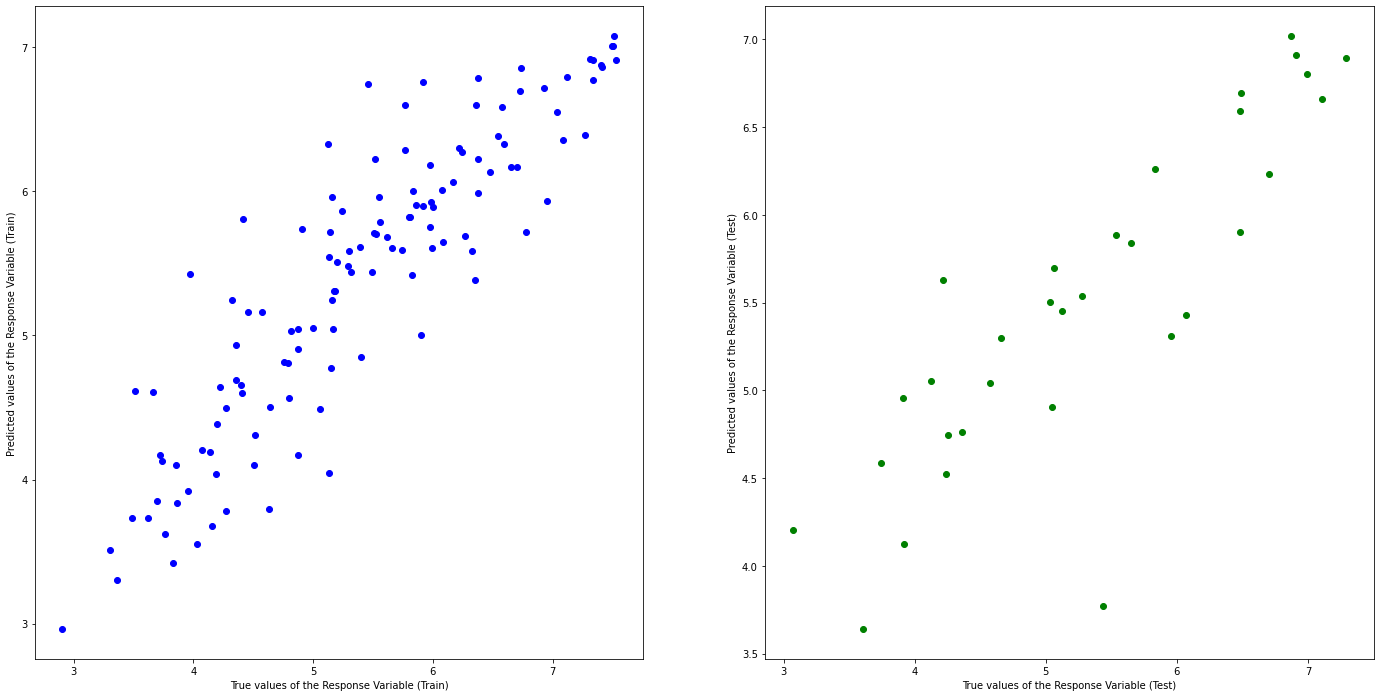

Goodness of Fit of Model 	Train Dataset(4 PREDICTORS)
Explained Variance (R^2) 	: 0.79673497313527
Mean Squared Error (MSE) 	: 0.25914856603966174
Root Mean Squared Error (RMSE) 	: 0.5090663670285651

Goodness of Fit of Model 	Test Dataset(4 PREDICTORS)
Explained Variance (R^2) 	: 0.7051206621831511
Mean Squared Error (MSE) 	: 0.4033492943567196
Root Mean Squared Error (RMSE) 	: 0.6350978620312933


In [44]:
# Make predictions using the testing set
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset(4 PREDICTORS)")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print()
print("Goodness of Fit of Model \tTest Dataset(4 PREDICTORS)")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

The <b>explained variance (R^2)</b> is higher than average for both train and test data set, which is pretty ideal. On the other hand, although the <b>mean squared error (MSE)</b> for both train and test data are considered low, indicating a high accuracy of these 4 predictors in predicting our response, Happiness Score.

### Conclusion for Linear Regression

Among the four predictors, <b>Economy (GDP per Capita)</b> is the first best variable to be used to predict our response variable, happiness score. This is because it has the highest explained variance (R^2) and lowest mean sqaured error (MSE) in the train dataset as well as the second lowest MSE in the test dataset. Next, <b>Family</b> is the second best varible to be used to predict our response variable, happiness score. This is because it has the second highest explained variance (R^2) and second lowest mean sqaured error (MSE) in the train dataset as well as the lowest MSE in the test dataset.

Hence, `linear regression` is an <b>ideal model</b> for our prediction as the statistics of multi-variable linear regression shows a <b>high explained variance</b> and a <b>low mean squared error</b>. The <b>high goodness of fit</b> of the model indicates that the numerical predictors have <b>high correlation</b> with the response variable, Happiness Score.

## Machine Learning II (Random Forest Regression)

`Random Forest Regression` uses an ensemble of trees for better classification. It works by combining multiple decision trees and predicting the outcome based on the average of the results obtained from all the decision trees.

In order to find out the best parameters in the Random Forest Regression model, namely `n_estimators` and `max_dept`,we implement Cross-Validation.

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [46]:
y = data["HAPPINESS SCORE"]
X = data[["ECONOMY (GDP PER CAPITA)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and score found
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.5512445821481082


Goodness of Fit of Model 	Train Dataset(ECONOMY (GDP PER CAPITA))
Explained Variance (R^2) 	: 0.8495455752096027
Mean Squared Error (MSE) 	: 0.191818774927282
Root Mean Squared Error (RMSE) 	: 0.43797120330825634
Goodness of Fit of Model 	Test Dataset(ECONOMY (GDP PER CAPITA))
Explained Variance (R^2) 	: 0.3958593544691056
Mean Squared Error (MSE) 	: 0.8263708975718401
Root Mean Squared Error (RMSE) 	: 0.9090494472644709


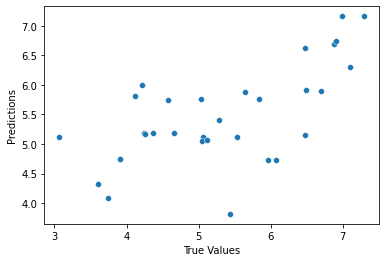

In [47]:
y = data["HAPPINESS SCORE"]
X = data[["ECONOMY (GDP PER CAPITA)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_train, rf.predict(X_train))
print("Goodness of Fit of Model \tTrain Dataset(ECONOMY (GDP PER CAPITA))")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

mse = mean_squared_error(y_test, y_pred)
print("Goodness of Fit of Model \tTest Dataset(ECONOMY (GDP PER CAPITA))")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

y = data["HAPPINESS SCORE"]
X = data[["FAMILY"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and score found
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.7368917679051641


Goodness of Fit of Model 	Train Dataset(FAMILY))
Explained Variance (R^2) 	: 0.7718862272116054
Mean Squared Error (MSE) 	: 0.2908289636630412
Root Mean Squared Error (RMSE) 	: 0.5392856049099041
Goodness of Fit of Model 	Test Dataset(FAMILY)
Explained Variance (R^2) 	: 0.5163644180840121
Mean Squared Error (MSE) 	: 0.6615386216472606
Root Mean Squared Error (RMSE) 	: 0.8133502453723492


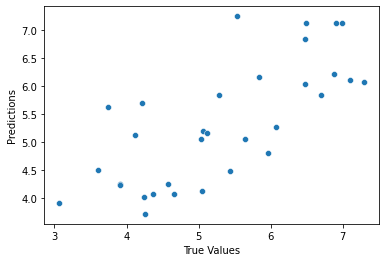

In [49]:
y = data["HAPPINESS SCORE"]
X = data[["FAMILY"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_train, rf.predict(X_train))
print("Goodness of Fit of Model \tTrain Dataset(FAMILY))")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

mse = mean_squared_error(y_test, y_pred)
print("Goodness of Fit of Model \tTest Dataset(FAMILY)")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV

y = data["HAPPINESS SCORE"]
X = data[["HEALTH (LIFE EXPECTANCY)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and score found
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.506711639484615


Goodness of Fit of Model 	Train Dataset(HEALTH (LIFE EXPECTANCY))
Explained Variance (R^2) 	: 0.8450757825484774
Mean Squared Error (MSE) 	: 0.19751744516333838
Root Mean Squared Error (RMSE) 	: 0.44442934777457976
Goodness of Fit of Model 	Test Dataset(HEALTH (LIFE EXPECTANCY))
Explained Variance (R^2) 	: 0.3471000468227069
Mean Squared Error (MSE) 	: 0.8930660837388426
Root Mean Squared Error (RMSE) 	: 0.9450217371779565


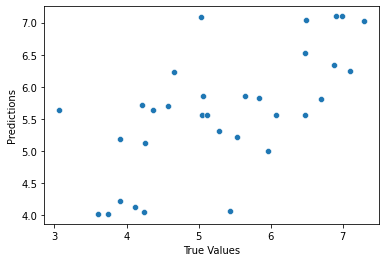

In [51]:
y = data["HAPPINESS SCORE"]
X = data[["HEALTH (LIFE EXPECTANCY)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_train, rf.predict(X_train))
print("Goodness of Fit of Model \tTrain Dataset(HEALTH (LIFE EXPECTANCY))")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

mse = mean_squared_error(y_test, y_pred)
print("Goodness of Fit of Model \tTest Dataset(HEALTH (LIFE EXPECTANCY))")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV

y = data["HAPPINESS SCORE"]
X = data[["FREEDOM"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and score found
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.9037870815666931


Goodness of Fit of Model 	Train Dataset(FREEDOM)
Explained Variance (R^2) 	: 0.621576389982737
Mean Squared Error (MSE) 	: 0.48246339965206436
Root Mean Squared Error (RMSE) 	: 0.6945958534659304
Goodness of Fit of Model 	Test Dataset(FREEDOM)
Explained Variance (R^2) 	: -0.13924100459066202
Mean Squared Error (MSE) 	: 1.558305368921064
Root Mean Squared Error (RMSE) 	: 1.248321019978861


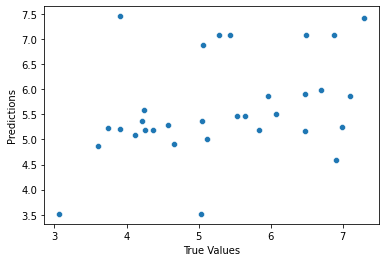

In [53]:
y = data["HAPPINESS SCORE"]
X = data[["FREEDOM"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_train, rf.predict(X_train))
print("Goodness of Fit of Model \tTrain Dataset(FREEDOM)")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

mse = mean_squared_error(y_test, y_pred)
print("Goodness of Fit of Model \tTest Dataset(FREEDOM)")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# 绘制预测结果和真实结果的散点图
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Goodness of Fit of Model 	Train Dataset(4 Predictors)
Explained Variance (R^2) 	: 0.9293324219515435
Mean Squared Error (MSE) 	: 0.0900961754180205
Root Mean Squared Error (RMSE) 	: 0.30016024956349646
Goodness of Fit of Model 	Test Dataset(4 Predictors)
Explained Variance (R^2) 	: 0.6217125367543963
Mean Squared Error (MSE) 	: 0.5174387004995149
Root Mean Squared Error (RMSE) 	: 0.7193321211370411


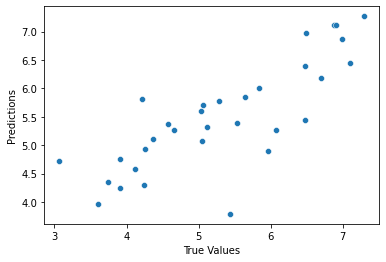

In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sb
import matplotlib.pyplot as plt

y = data["HAPPINESS SCORE"]
X = pd.DataFrame(data[["ECONOMY (GDP PER CAPITA)", "FAMILY", "HEALTH (LIFE EXPECTANCY)", "FREEDOM"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_train, rf.predict(X_train))
print("Goodness of Fit of Model \tTrain Dataset(4 Predictors)")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

mse = mean_squared_error(y_test, y_pred)
print("Goodness of Fit of Model \tTest Dataset(4 Predictors)")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Conclusion

Among the four predictors, <b>Economy (GDP per Capita)</b> is the first best variable to be used to predict our response variable, happiness score. This is because it has the highest explained variance (R^2) and second lowest mean sqaured error (MSE) in the train dataset as well as the lowest MSE in the test dataset. Next, <b>Family</b> is the second best varible to be used to predict our response variable, happiness score. This is because it has the second highest explained variance (R^2) and  lowest mean sqaured error (MSE) in the train dataset as well as the second lowest MSE in the test dataset.

Hence, `random forest regression` is a <b>more ideal model</b> compared to linear regression for our prediction as the statistics of multi-variable linear regression shows a <b>higher explained variance</b> and a <b>lower mean squared error</b>. The <b>higher goodness of fit</b> of the model indicates that the numerical predictors have <b>very high correlation</b> with the response variable, happiness score.

--- 
## Machine Learning III (Decision Tree Classification)

In decision tree classification, the response variable is categorical or qualitative. It represents the outcome or class to which the observation belongs. Thus, we decide to use **FAMILY** and **ECONOMY (GDP PER CAPITA)** to predict **Happiness Score**.

As FAMILY and ECONOMY (GDP PER CAPITA) are **numeric** variables, we decide to change them into **categorical** variables. 

Here, we use mean as a classifier, **0 indicates relative low family support and 1 indicated high family support** for FAMILY. **0 indicates relative low GDP and 1 indicated high GDP** for ECOCOMY (GDP PER CAPITA). 

In [55]:
mean_value = data['FAMILY'].mean()
mean_value2 = data['ECONOMY (GDP PER CAPITA)'].mean()
data['FAMILYCAT'] = data['FAMILY'].apply(lambda x: 1 if x > mean_value else 0)
data['GDP'] = data['ECONOMY (GDP PER CAPITA)'].apply(lambda x: 1 if x > mean_value else 0)
data.head()

,COUNTRY,CONTINENT,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY (GDP PER CAPITA),FAMILY,HEALTH (LIFE EXPECTANCY),FREEDOM,TRUST (GOVERNMENT CORRUPTION),GENEROSITY,DYSTOPIA RESIDUAL,FAMILYCAT,GDP
0,Denmark,Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,1,1
1,Switzerland,Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,1,1
2,Iceland,Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,1,1
3,Norway,Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,1,1
4,Finland,Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,1,1


<AxesSubplot:xlabel='count', ylabel='FAMILYCAT'>

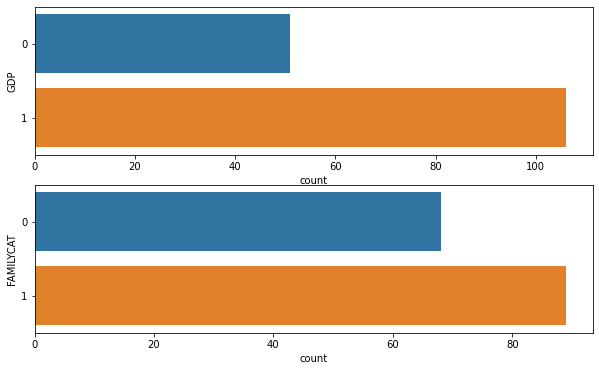

In [56]:
f, axes = plt.subplots(2, 1, figsize=(10,6))

sb.countplot(y='GDP', data=data, ax=axes[0])
sb.countplot(y='FAMILYCAT', data=data, ax=axes[1])

In [57]:
countG, countB = data['GDP'].value_counts()
print("Ratio of GDP is 0 : 1 = ", countG, ":", countB)

Ratio of GDP is 0 : 1 =  106 : 51


In [58]:
countG, countB = data['FAMILYCAT'].value_counts()
print("Ratio of FAMILY is 0 : 1 = ", countG, ":", countB)

Ratio of FAMILY is 0 : 1 =  89 : 68


<AxesSubplot:xlabel='HAPPINESS SCORE', ylabel='FAMILYCAT'>

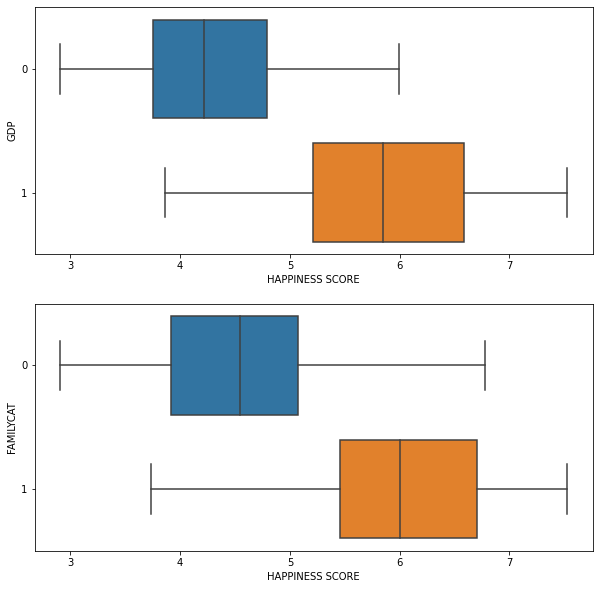

In [59]:
f, axes = plt.subplots(2,1, figsize=(10,10))
sb.boxplot(x=data["HAPPINESS SCORE"], y=data["GDP"], orient="h", ax = axes[0])
sb.boxplot(x=data["HAPPINESS SCORE"], y=data["FAMILYCAT"], orient="h", ax = axes[1])

Here we can see the trend that **High** Happiness Score relates to **High** Family Support and **High** GDP and vise versa.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

We split the dataset in Train and Test sets, uniformly at random.   
Train Set with 80% of data and Test Set with 20% of data.     

[Text(0.47058823529411764, 0.9, 'HAPPINESS SCORE <= 5.17\ngini = 0.483\nsamples = 125\nvalue = [51, 74]\nclass = High Family Support'),
 Text(0.17647058823529413, 0.7, 'HAPPINESS SCORE <= 3.965\ngini = 0.341\nsamples = 55\nvalue = [43, 12]\nclass = Low Family Support'),
 Text(0.11764705882352941, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = Low Family Support'),
 Text(0.23529411764705882, 0.5, 'HAPPINESS SCORE <= 4.34\ngini = 0.42\nsamples = 40\nvalue = [28, 12]\nclass = Low Family Support'),
 Text(0.11764705882352941, 0.3, 'HAPPINESS SCORE <= 4.148\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = High Family Support'),
 Text(0.058823529411764705, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = High Family Support'),
 Text(0.17647058823529413, 0.1, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Low Family Support'),
 Text(0.35294117647058826, 0.3, 'HAPPINESS SCORE <= 4.891\ngini = 0.328\nsamples = 29\nvalue = [23, 6]\nclass = Low Family Support'),
 Text(0.2

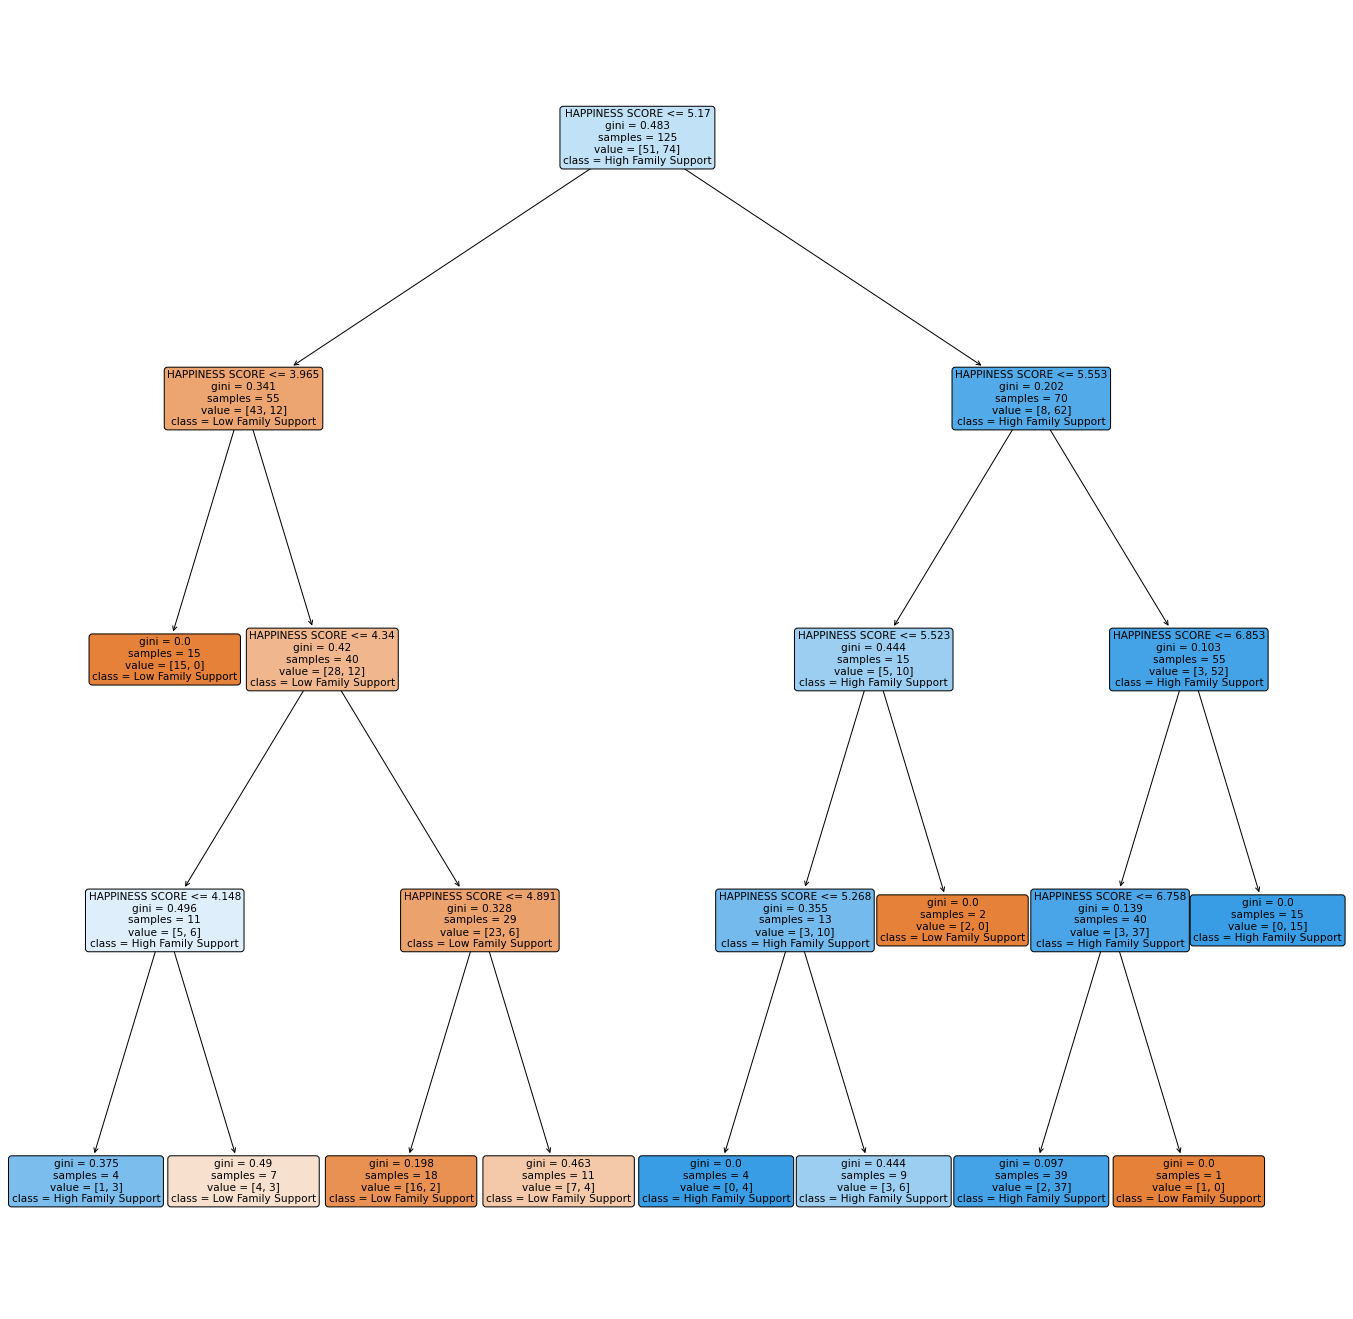

In [61]:
# Extract Response and Predictors
y = pd.DataFrame(data['FAMILYCAT'])
X = pd.DataFrame(data['HAPPINESS SCORE'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Low Family Support","High Family Support"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Goodness of Fit of Model 	Train Dataset (FAMILY)
Classification Accuracy 	: 0.88

Goodness of Fit of Model 	Test Dataset (FAMILY)
Classification Accuracy 	: 0.78125

Confusion Matrix - depth of 4
TPR Train :	 0.8783783783783784
TNR Train :	 0.8823529411764706

FPR Train :	 0.11764705882352941
FNR Train :	 0.12162162162162163

TPR Test :	 0.8
TNR Test :	 0.7647058823529411

FPR Test :	 0.23529411764705882
FNR Test :	 0.2


<AxesSubplot:>

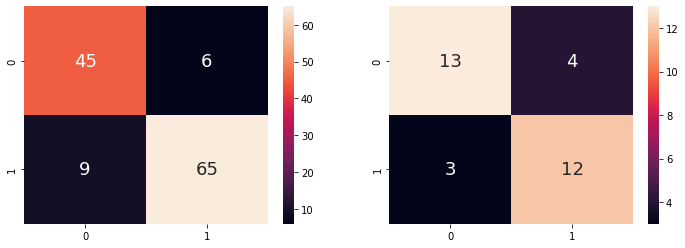

In [62]:
# Recall the Legendary-Total Dataset
fm = pd.DataFrame(data['FAMILYCAT'])   # Response
hs = pd.DataFrame(data['HAPPINESS SCORE'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(hs, fm, test_size = 0.20, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset (FAMILY)")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset (FAMILY)")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

print("Confusion Matrix - depth of 4")

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

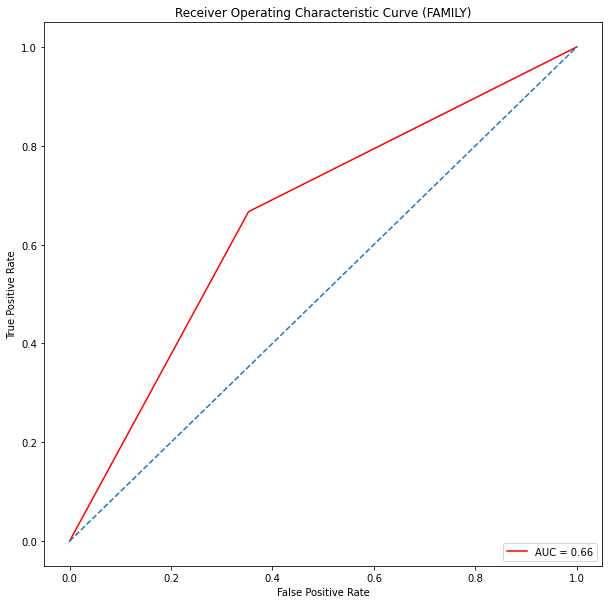

In [63]:
from sklearn.metrics import roc_curve, auc

X = data[['HAPPINESS SCORE']]
y = data['FAMILYCAT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_RF = DecisionTreeClassifier(random_state=42)
model_RF.fit(X_train, y_train)

y_pred = model_RF.predict(X_test)

y_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (FAMILY)')
plt.legend(loc="lower right")
plt.show()

[Text(0.5921052631578947, 0.9, 'HAPPINESS SCORE <= 5.09\ngini = 0.451\nsamples = 125\nvalue = [43, 82]\nclass = High GDP'),
 Text(0.2894736842105263, 0.7, 'HAPPINESS SCORE <= 4.3\ngini = 0.31\nsamples = 47\nvalue = [38, 9]\nclass = Low GDP'),
 Text(0.10526315789473684, 0.5, 'HAPPINESS SCORE <= 3.861\ngini = 0.147\nsamples = 25\nvalue = [23, 2]\nclass = Low GDP'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Low GDP'),
 Text(0.15789473684210525, 0.3, 'HAPPINESS SCORE <= 4.001\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = Low GDP'),
 Text(0.10526315789473684, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = High GDP'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Low GDP'),
 Text(0.47368421052631576, 0.5, 'HAPPINESS SCORE <= 4.484\ngini = 0.434\nsamples = 22\nvalue = [15, 7]\nclass = Low GDP'),
 Text(0.3684210526315789, 0.3, 'HAPPINESS SCORE <= 4.409\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclas

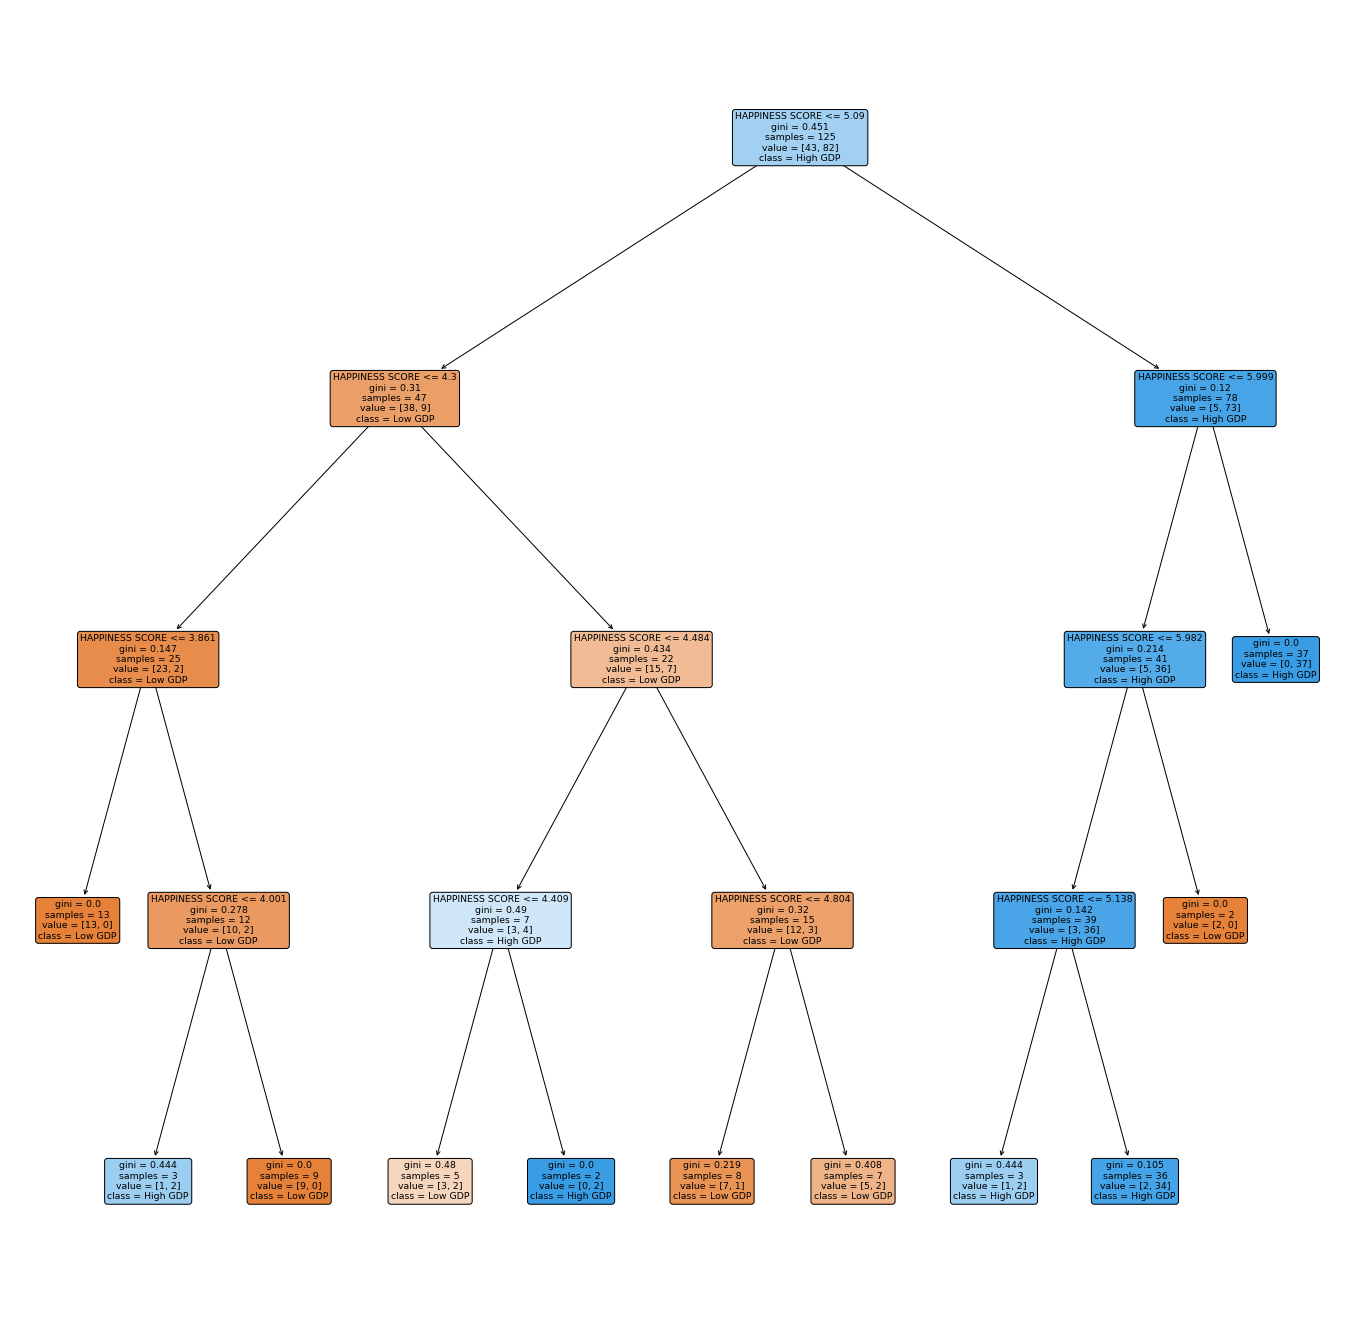

In [64]:
# Extract Response and Predictors
y = pd.DataFrame(data['GDP'])
X = pd.DataFrame(data['HAPPINESS SCORE'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Low GDP","High GDP"])

Goodness of Fit of Model 	Train Dataset (GDP)
Classification Accuracy 	: 0.928

Goodness of Fit of Model 	Test Dataset (GDP)
Classification Accuracy 	: 0.65625

Confusion Matrix - depth of 4
TPR Train :	 0.9390243902439024
TNR Train :	 0.9069767441860465

FPR Train :	 0.09302325581395349
FNR Train :	 0.06097560975609756

TPR Test :	 0.6666666666666666
TNR Test :	 0.625

FPR Test :	 0.375
FNR Test :	 0.3333333333333333


<AxesSubplot:>

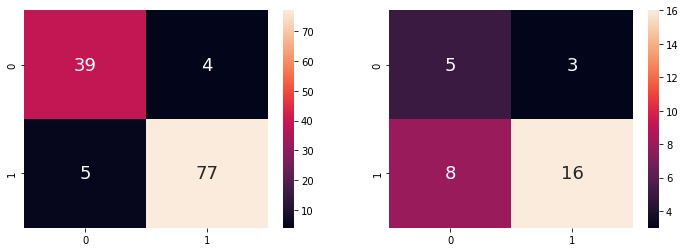

In [65]:
#### Recall the Legendary-Total Dataset
gdp = pd.DataFrame(data['GDP'])   # Response
hs = pd.DataFrame(data['HAPPINESS SCORE'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(hs, gdp, test_size = 0.20, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset (GDP)")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset (GDP)")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

print("Confusion Matrix - depth of 4")

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

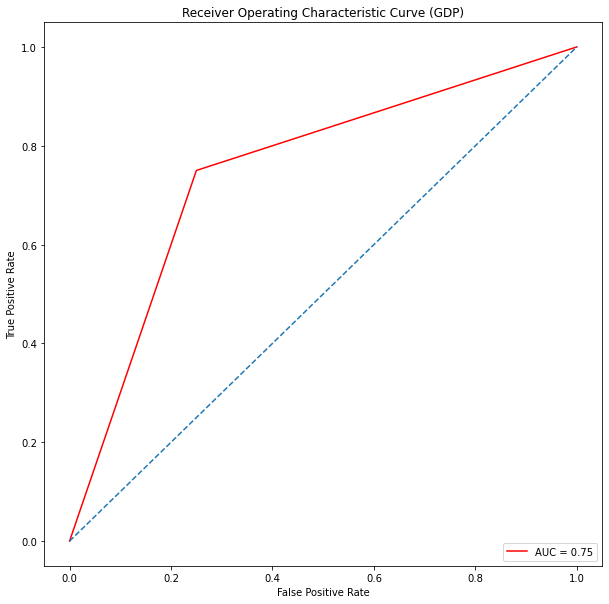

In [66]:
X = data[['HAPPINESS SCORE']]
y = data['GDP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_RF = DecisionTreeClassifier(random_state=42)
model_RF.fit(X_train, y_train)


y_pred = model_RF.predict(X_test)


y_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (GDP)')
plt.legend(loc="lower right")
plt.show()

### Conclusion for Decision Tree Classification

Based on the accuracy and TPR on train set, we found that the decision tree classification model appears to perform better on the GDP variable than on the FAMILY variable as both are higher. Nevertheless, if we look at the accuracy and TPR on test set, the decision tree classification model appears to perform better on the FAMILY variable than on the GDP variable. We can't accurately tell which one is better.

Thus, we construct ROC curves （a graph that plots the relationship between the true positive rate (TPR) and the false positive rate (FPR)）to determine which one performs better. Based on the provided AUC values, the decision tree classification model has a **higher AUC value for GDP (0.75) compared to FAMILY (0.66)**, which suggests that the model is better at distinguishing between GDP cases compared to FAMILY cases.

---
## Machine Learning IV (Random Forest Classification)

Previously, we utilised the **DecisionTreeClassifier**, but now we will employ the **RandomForestClassifier** to construct an improved model. The **RandomForestClassifier** is a meta estimator that creates several decision tree classifiers on different sub-samples of the dataset and leverages averaging to increase predictive accuracy and mitigate over-fitting. Essentially, we went from having just one tree to having a whole forest, resulting in a more precise outcome.

We set the two major hyper-parameters of Random Forest which are **n_estimators** (the number of decision trees in the forest) and **max_depth** (of each decision tree in the forest) to **500** and **5** respectively to improve our previous result from Decision Tree Classification.

In [67]:
from sklearn.ensemble import RandomForestClassifier

Train Data (GDP)
Accuracy  :	 0.968

TPR Train :	 0.9634146341463414
TNR Train :	 0.9767441860465116

FPR Train :	 0.023255813953488372
FNR Train :	 0.036585365853658534

Test Data (GDP)
Accuracy  :	 0.71875

TPR Test :	 0.7083333333333334
TNR Test :	 0.75

FPR Test :	 0.25
FNR Test :	 0.2916666666666667


<AxesSubplot:>

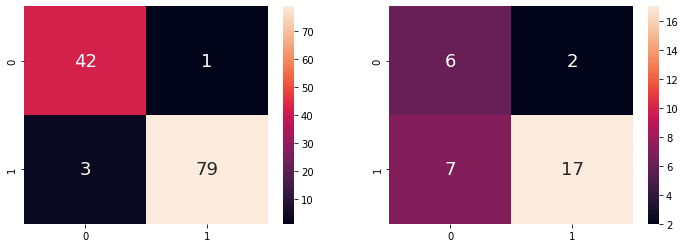

In [68]:
# Extract Response and Predictors
y = pd.DataFrame(data['GDP'])
X = pd.DataFrame(data['HAPPINESS SCORE'])     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create the Random Forest object
rfr = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rfr.fit(X_train, y_train.GDP.ravel())

y_train_pred = rfr.predict(X_train)

# Print the Classification Accuracy
print("Train Data (GDP)")
print("Accuracy  :\t", rfr.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives  : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

y_test_pred = rfr.predict(X_test)

# Print the Classification Accuracy
print("Test Data (GDP)")
print("Accuracy  :\t", rfr.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

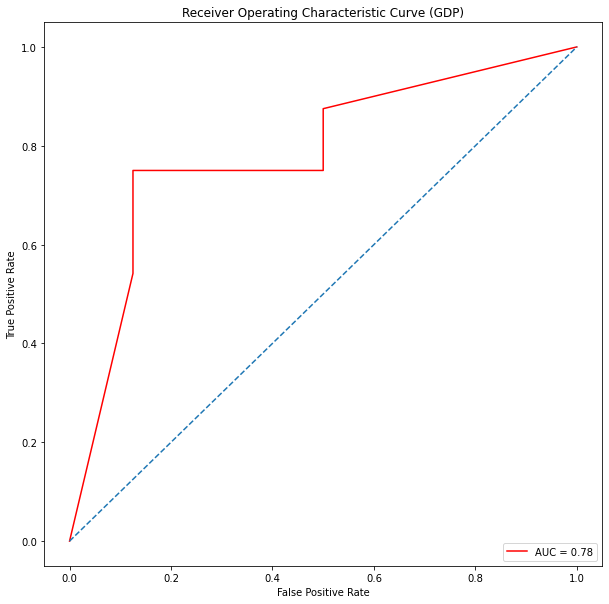

In [69]:
X = data[['HAPPINESS SCORE']]
y = data['GDP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)


y_pred = model_RF.predict(X_test)


y_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (GDP)')
plt.legend(loc="lower right")
plt.show()

Train Data (FAMILY)
Accuracy  :	 0.92

TPR Train :	 0.9054054054054054
TNR Train :	 0.9411764705882353

FPR Train :	 0.058823529411764705
FNR Train :	 0.0945945945945946

Test Data (FAMILY)
Accuracy  :	 0.78125

TPR Test :	 0.8
TNR Test :	 0.7647058823529411

FPR Test :	 0.23529411764705882
FNR Test :	 0.2


<AxesSubplot:>

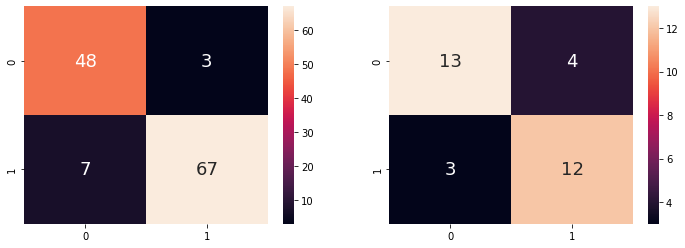

In [70]:
# Extract Response and Predictors
y = pd.DataFrame(data['FAMILYCAT'])
X = pd.DataFrame(data['HAPPINESS SCORE'])     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create the Random Forest object
rfr = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rfr.fit(X_train, y_train.FAMILYCAT.ravel())

y_train_pred = rfr.predict(X_train)

# Print the Classification Accuracy
print("Train Data (FAMILY)")
print("Accuracy  :\t", rfr.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

y_test_pred = rfr.predict(X_test)

# Print the Classification Accuracy
print("Test Data (FAMILY)")
print("Accuracy  :\t", rfr.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

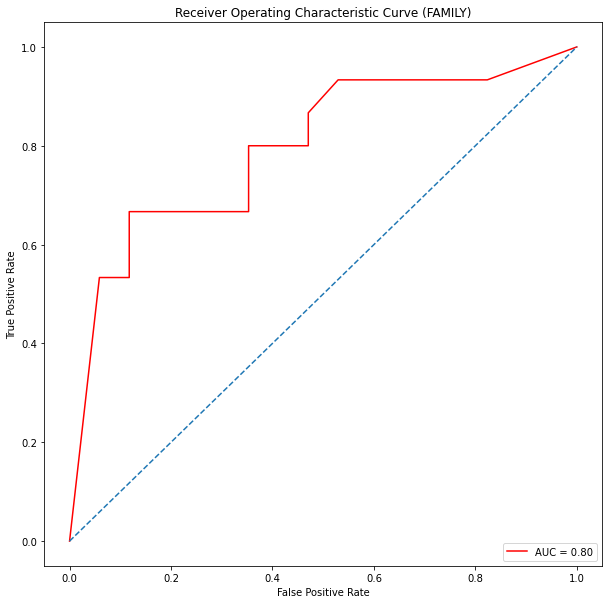

In [71]:

X = data[['HAPPINESS SCORE']]
y = data['FAMILYCAT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)


y_pred = model_RF.predict(X_test)


y_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (FAMILY)')
plt.legend(loc="lower right")
plt.show()

### Conclusion for Random Forest Classification

Based on the results, we have improve our results by **increasing accuracy, TRP and AUC as well as decreasing FPR**. Also, the two models of GDP and family are quite similar as their values are not largely different to each other.

---
## Machine Learning V (Logistic Regression)

In `logistic regression`, the relationship between the predictors and the response variable is modeled using a logistic function, also known as the sigmoid function. The logistic function maps any input value to a value between 0 and 1, which can be interpreted as a probability score. For example, by inputting the value of family, we could obtain the happiness score according to the <b>sigmoid fucntion (S-shaped curve)</b>.

Logistic Regression model accuracy (in %): 71.875


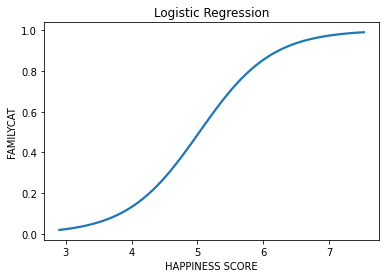

In [72]:
#import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['HAPPINESS SCORE']]
y = data['FAMILYCAT']

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# LogisticRegression with modified solver and max_iter parameters
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

import matplotlib.pyplot as plt
import numpy as np


clf.fit(X_train, y_train)

# Plot decision boundary
sns.regplot(x=X_train, y=y_train, logistic=True, ci=None, scatter=False)

plt.xlabel('HAPPINESS SCORE')
plt.ylabel('FAMILYCAT')
plt.title('Logistic Regression')
plt.show()

The logistic regression model has achieved an accuracy of <b>71.875%</b> on the train dataset, which is considered a high accuracy.

Logistic Regression model accuracy (in %): 75.0


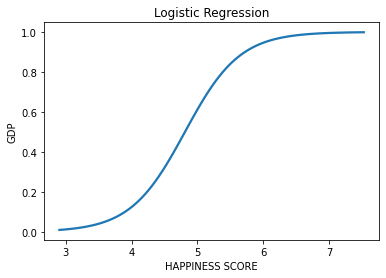

In [73]:
#import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['HAPPINESS SCORE']]
y = data['GDP']

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# LogisticRegression with modified solver and max_iter parameters
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

import matplotlib.pyplot as plt
import numpy as np

clf.fit(X_train, y_train)

# Plot decision boundary
sns.regplot(x=X_train, y=y_train, logistic=True, ci=None, scatter=False)

plt.xlabel('HAPPINESS SCORE')
plt.ylabel('GDP')
plt.title('Logistic Regression')
plt.show()

The logistic regression model has achieved an accuracy of <b>75.0%</b> on the test dataset, which is considered a high accuracy and it is also higher than that of the train dataset.

---
### Comparison of Logistic Regression, Random Forest Classification, and Decision Tree Classification

**Hyperparameter tuning**: optimising the performance of a model by tuning its hyperparameters using K-fold method and cross-validation score

Here we performs performance evaluation of three classification models, namely **Logistic Regression, Random Forest Classification, and Decision Tree Classification.** Specifically, K-fold cross-validation is used to estimate the classification accuracy of each model for evaluating their performance. 

In [74]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# define models
log_reg = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

models = []
# add our tuned models into list
models.append(('Logistic Regression', log_reg))
models.append(('Random Forest Classification', rfc))
models.append(('Decision Tree Classification', dtc))

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=64)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    # print mean accuracy and standard deviation
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

Logistic Regression: 0.821250 (0.071333)
Random Forest Classification: 0.802500 (0.073862)
Decision Tree Classification: 0.802500 (0.073862)


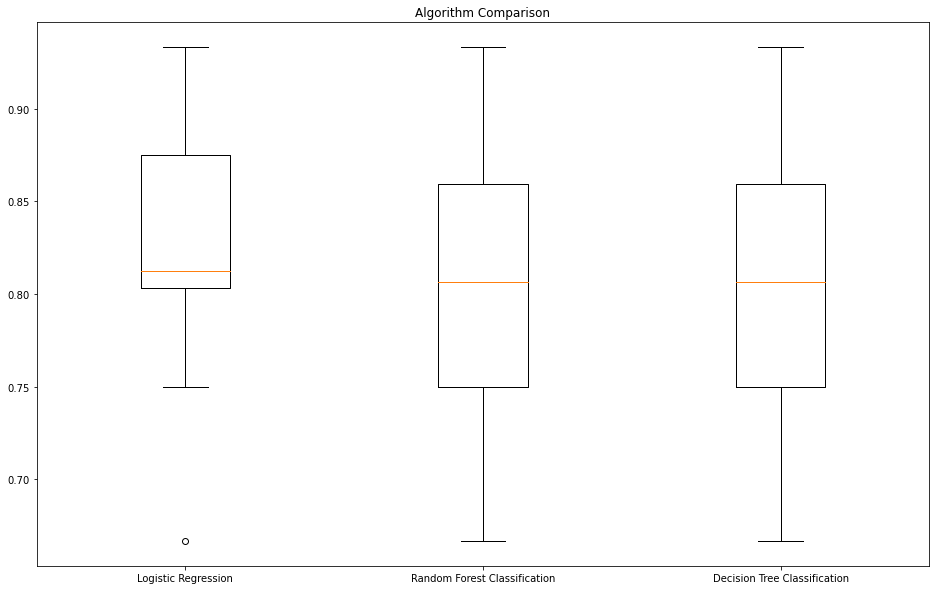

In [75]:
fig = plt.figure(figsize=(16,10))
plt.boxplot(results)
plt.title('Algorithm Comparison')
plt.xticks([1,2,3], names)
plt.show()

This output shows the performance evaluation results of three classifiers (Logistic Regression, Random Forest Classification, and Decision Tree Classification). Under 10-fold cross-validation, the average accuracy of **Logistic Regression** is 0.821250 with a standard deviation of 0.071333, while the average accuracy of **Random Forest Classification** and **Decision Tree Classification** are both 0.802500 with the same standard deviation of 0.073862. Therefore, on this dataset, **the Logistic Regression model performs better than the Random Forest and Decision Tree models.**